# TEAM PROJECT 

### CPSC-4810-001

Team members:

- Anna Dorosheva

- Andres Obregon

- Javier Merino

- Karina Bautista

# Data: Fire Dataset

### Description:

This project is based on the Fire dataset from the years 2013 to 2023 of British Columbia. Fire dataset has in total 11,073,907 obs. of 40 variables. 

- lat: Latitude (Categorical, Ordinal)
- lon: Longitude (Categorical, Ordinal)
- rep_date: Date and time (-, -)
- uid: Unique ID (Categorical, Ordinal)
- source: The government agency provides the information (Categorical, Nominal)
- sensor: Type of equipment (Categorical, Nominal)
- satellite: Satellite used by the agencies (Categorical, Nominal)
- agency: Province and territory of Canada (Categorical, Nominal)
- temp: Temperature (Numerical, Continuous)
- rh: Relative Humidity (Numerical, Discrete)
- ws: Wind speed (Numerical, Continuous)
- wd: Wind direction (Numerical, Discrete)
- pcp: Precipitation (Numerical, Continuous)
- ffmc: The Fine Fuel Moisture Code (Numerical, Continuous)
- dmc: Duff Moisture Code (Numerical, Continuous)
- dc: Drought Code (Numerical, Continuous)
- isi: Initial Spread Index (Numerical, Continuous)
- bui: Buildup Index (Numerical, Continuous)
- fwi: Fire Weather Index (Numerical, Continuous)
- fuel: Combustible to maintain the fire (Categorical, Nominal)
- ros: Rate of spread (Numerical, Continuous)
- sfc: Surface Fuel Consumption (Numerical, Continuous)
- tfc: Total fuel consumption (Numerical, Continuous)
- bfc: Bonfire fuel consumption (Numerical, Continuous)
- hfi: Head Fire Intensity (Numerical, Discrete)
- cfb: Crown Fraction Burned (Numerical, Discrete)
- age: Forest Age (Categorical, Discrete)
- estarea: Estimated area (Numerical, Continuous)
- polyid: Fire point identified by satellites (Categorical, Discrete)
- pcuring: Percent curing (Numerical, Discrete)
- cfactor: Curing factor (Numerical, Continuous)
- greenup: Phenological state of deciduous trees (Categorical, Discrete)
- elev: Elevation above sea level (Numerical, Discrete)
- cfl: Crown fuel load (Numerical, Continuous)
- tfc0: Total fuel consumption (Numerical, Continuous)
- sfl: Surface fuel load (Numerical, Continuous)
- ecozone: Ecozone in which hotspot is located (Numerical, Discrete)
- sfc0: Surface Fuel Consumption (Numerical, Continuous)
- cbh: Crown base height (Numerical, Continuous)
- geometry: Geometry points (Multipoint, Multipoint)

# Import necesary libraries

In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data_path = './Data'  # Adjust this path to your folder with CSV files
data_path

'./Data'

# List and Filter "Hotspots" Files

For this part we list and filter the files we want to analyze 'Hotspots'. In addition, we check that all of the columns are in lower case because some files have lower column names and others haver upper column names.

In [9]:
# Assuming the directory containing the files is in 'data_path'
# List all files in the data directory
all_files = os.listdir(data_path)

# Filter for files with "Hotspots" in their names
hotspots_files = [f for f in all_files if "Hotspots" in f]

# Iterate over each file and ensure column names are lowercase
for file in hotspots_files:
    # Construct the full path to the file
    file_path = os.path.join(data_path, file)
    
    # Load the file (assuming CSV format, adjust if necessary)
    df = pd.read_csv(file_path)
    
    # Ensure column names are lowercase
    df.columns = [col.lower() for col in df.columns]
    
    # Save the modified dataframe back to the same file (or a new file)
    df.to_csv(file_path, index=False)  # Overwrite the original file
    # Alternatively, save with a different name if you want to keep the original intact
    # df.to_csv(os.path.join(data_path, f"lowercase_{file}"), index=False)

    print(f"Columns in {file} have been converted to lowercase.")

print("All hotspot files have been processed.")


Columns in 2017_Hotspots.csv have been converted to lowercase.
Columns in 2021_Hotspots.csv have been converted to lowercase.
Columns in 2016_Hotspots.csv have been converted to lowercase.
Columns in 2020_Hotspots.csv have been converted to lowercase.
Columns in 2018_Hotspots.csv have been converted to lowercase.
Columns in 2019_Hotspots.csv have been converted to lowercase.
Columns in 2013_Hotspots.csv have been converted to lowercase.
Columns in 2014_Hotspots.csv have been converted to lowercase.
Columns in 2022_Hotspots.csv have been converted to lowercase.
Columns in 2015_Hotspots.csv have been converted to lowercase.
Columns in 2023_Hotspots.csv have been converted to lowercase.
All hotspot files have been processed.


# Compare if the datasets have the same columns

The datasets do not have the same columns. We want all the data to have the same columns and number of columns, so we will have the 33 first columns since all data have it.

In [10]:
# List to hold the set of columns for each file
columns_sets = []

# Iterate over each file to collect columns
for file in hotspots_files:
    # Construct the full path to the file
    file_path = os.path.join(data_path, file)
    
    # Load the file (assuming CSV format)
    df = pd.read_csv(file_path)
    
    # Get the set of columns (unique column names) for this file
    columns_sets.append(set(df.columns))
    
    # Print the number of columns for each file (optional)
    print(f"{file} has {len(df.columns)} columns.")

# Find the intersection of all column sets (common columns across all files)
common_columns = set.intersection(*columns_sets)

# Print the common columns
if common_columns:
    print("\nCommon columns across all files:")
    for col in common_columns:
        print(col)
else:
    print("\nNo common columns across all files.")

# Convert the set of common columns to a list (required for DataFrame indexing)
common_columns = list(common_columns)

# Now update each file to keep only the common columns
for file in hotspots_files:
    # Construct the full path to the file
    file_path = os.path.join(data_path, file)
    
    # Load the file (assuming CSV format)
    df = pd.read_csv(file_path)
    
    # Retain only the common columns
    df_filtered = df[common_columns]
    
    # Save the modified dataframe back to the same file (overwrite the original file)
    df_filtered.to_csv(file_path, index=False)
    print(f"Updated {file} to retain only the common columns.")

print("All files have been updated to retain only the common columns.")

2017_Hotspots.csv has 27 columns.
2021_Hotspots.csv has 27 columns.
2016_Hotspots.csv has 27 columns.
2020_Hotspots.csv has 27 columns.
2018_Hotspots.csv has 27 columns.
2019_Hotspots.csv has 27 columns.
2013_Hotspots.csv has 27 columns.
2014_Hotspots.csv has 27 columns.
2022_Hotspots.csv has 27 columns.
2015_Hotspots.csv has 27 columns.
2023_Hotspots.csv has 27 columns.

Common columns across all files:
elev
greenup
fuel
pcp
temp
fwi
rep_date
sfc
tfc
ws
lon
wd
dmc
source
cfb
rh
dc
sensor
satellite
ros
agency
isi
lat
hfi
pcuring
bui
ffmc
Updated 2017_Hotspots.csv to retain only the common columns.
Updated 2021_Hotspots.csv to retain only the common columns.
Updated 2016_Hotspots.csv to retain only the common columns.
Updated 2020_Hotspots.csv to retain only the common columns.
Updated 2018_Hotspots.csv to retain only the common columns.
Updated 2019_Hotspots.csv to retain only the common columns.
Updated 2013_Hotspots.csv to retain only the common columns.
Updated 2014_Hotspots.csv to 

In [11]:
for file in hotspots_files:
    # Construct the full path to the file
    file_path = os.path.join(data_path, file)
    
    # Load the file (assuming CSV format)
    df = pd.read_csv(file_path)
    
    # Get the set of columns (unique column names) for this file
    columns_sets.append(set(df.columns))
    
    # Print the number of columns for each file (optional)
    print(f"{file} has {len(df.columns)} columns.")

2017_Hotspots.csv has 27 columns.
2021_Hotspots.csv has 27 columns.
2016_Hotspots.csv has 27 columns.
2020_Hotspots.csv has 27 columns.
2018_Hotspots.csv has 27 columns.
2019_Hotspots.csv has 27 columns.
2013_Hotspots.csv has 27 columns.
2014_Hotspots.csv has 27 columns.
2022_Hotspots.csv has 27 columns.
2015_Hotspots.csv has 27 columns.
2023_Hotspots.csv has 27 columns.


# Merge the dataframes

Load files into a single DataFrame

In [12]:
# empty list to store DataFrames
data_frames = []

# Load each file into a DataFrame
for file in hotspots_files:
    file_path = os.path.join(data_path, file)
    df = pd.read_csv(file_path)
    
    # Add a column to id the year (from the file name)
    df["Year"] = file.split("_")[0]
    data_frames.append(df)

# Combine all DataFrames into a single DataFrame
combined_data = pd.concat(data_frames, ignore_index=True)

# Check the structure of the df
print(combined_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10860704 entries, 0 to 10860703
Data columns (total 28 columns):
 #   Column     Dtype  
---  ------     -----  
 0   elev       float64
 1   greenup    float64
 2   fuel       object 
 3   pcp        float64
 4   temp       float64
 5   fwi        float64
 6   rep_date   object 
 7   sfc        float64
 8   tfc        float64
 9   ws         float64
 10  lon        float64
 11  wd         int64  
 12  dmc        float64
 13  source     object 
 14  cfb        float64
 15  rh         int64  
 16  dc         float64
 17  sensor     object 
 18  satellite  object 
 19  ros        float64
 20  agency     object 
 21  isi        float64
 22  lat        float64
 23  hfi        float64
 24  pcuring    float64
 25  bui        float64
 26  ffmc       float64
 27  Year       object 
dtypes: float64(19), int64(2), object(7)
memory usage: 2.3+ GB
None


In [13]:
print(combined_data.columns)

Index(['elev', 'greenup', 'fuel', 'pcp', 'temp', 'fwi', 'rep_date', 'sfc',
       'tfc', 'ws', 'lon', 'wd', 'dmc', 'source', 'cfb', 'rh', 'dc', 'sensor',
       'satellite', 'ros', 'agency', 'isi', 'lat', 'hfi', 'pcuring', 'bui',
       'ffmc', 'Year'],
      dtype='object')


In [14]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Adjust width
pd.set_option('display.max_rows', 300)       # Show up to 50 rows, adjust as needed
pd.set_option('display.max_colwidth', 200)  # Increase column width if necessary

# Display the dataframe
print(combined_data)

            elev  greenup   fuel    pcp    temp     fwi  \
0          164.0      0.0     C1  0.000  23.289   7.813   
1          410.0      0.0     O1  0.000  21.838  33.884   
2         1657.0      1.0     M1  0.005  26.548  58.983   
3         2005.0      1.0     O1  0.000  20.930  35.007   
4          108.0      0.0     C1  0.000  25.981  10.430   
...          ...      ...    ...    ...     ...     ...   
10860699    61.0      NaN  M1_50  2.564  13.327   0.086   
10860700    61.0      NaN     C6  1.501  10.032   0.032   
10860701    61.0      NaN     C6  1.492  10.036   0.033   
10860702    61.0      NaN     C3  1.506  10.072   0.033   
10860703    61.0      NaN     C3  1.511  10.079   0.032   

                         rep_date       sfc       tfc      ws         lon  \
0             2017-03-01 19:10:00  0.232937  0.232937  25.249  -95.940000   
1             2017-03-01 19:10:00  0.350000  0.350000  26.327  -99.399000   
2             2017-09-08 05:43:00  3.168000  3.556010  17.97

# Change data type to save memory

In [15]:
# Check the memory usage before optimization
print(f"The memory usage before optimization is: {combined_data.memory_usage().sum() / (1024 ** 2):.2f} MB")

The memory usage before optimization is: 2320.10 MB


In order to reduce memory in our data, we are going to do the following procedures:

- Convert float 64 to float 32

In [16]:
float_columns = combined_data.select_dtypes(include=['float64']).columns
combined_data[float_columns] = combined_data[float_columns].astype('float32')

- Convert int 32 to int 16

In [17]:
int_columns = combined_data.select_dtypes(include=['int64']).columns
for col in int_columns:
    # Check the range of the integer column and cast accordingly
    if combined_data[col].min() >= -2147483648 and combined_data[col].max() <= 2147483647:
        combined_data[col] = combined_data[col].astype('int32')
    elif combined_data[col].min() >= -32768 and combined_data[col].max() <= 32767:
        combined_data[col] = combined_data[col].astype('int16')

- Convert object columns to category dtype.

This is done for columns that contain repeated values (such as categorical data) that can be better stored in a more memory-efficient way. f the column has more than 50% of repeated values, it will be converted from object (which stores text) to category.

In [18]:
object_columns = combined_data.select_dtypes(include=['object']).columns
for col in object_columns:
    if combined_data[col].nunique() / len(combined_data) < 0.5:  # if more than 50% values are repeated
        combined_data[col] = combined_data[col].astype('category')



- Convert datatime columns:

We convert the values in the rep_date column from strings  into datetime objects so that they can be treated as proper dates and times in pandas.

In [19]:
if 'rep_date' in combined_data.columns:
    combined_data['rep_date'] = pd.to_datetime(combined_data['rep_date'], format="%Y/%m/%d %H:%M:%S.%f", errors='coerce')

In [20]:
# Check the memory usage before optimization (without deep calculation)
print(f"Memory usage after optimization: {combined_data.memory_usage().sum() / (1024 ** 2):.2f} MB")

Memory usage after optimization: 1015.05 MB


In [21]:
print(combined_data.dtypes)

elev                float32
greenup             float32
fuel               category
pcp                 float32
temp                float32
fwi                 float32
rep_date     datetime64[ns]
sfc                 float32
tfc                 float32
ws                  float32
lon                 float32
wd                    int32
dmc                 float32
source             category
cfb                 float32
rh                    int32
dc                  float32
sensor             category
satellite          category
ros                 float32
agency             category
isi                 float32
lat                 float32
hfi                 float32
pcuring             float32
bui                 float32
ffmc                float32
Year               category
dtype: object


# Data cleaning

In [22]:
print(combined_data.head())

     elev  greenup fuel    pcp       temp        fwi rep_date       sfc  \
0   164.0      0.0   C1  0.000  23.289000   7.813000      NaT  0.232937   
1   410.0      0.0   O1  0.000  21.837999  33.883999      NaT  0.350000   
2  1657.0      1.0   M1  0.005  26.548000  58.983002      NaT  3.168000   
3  2005.0      1.0   O1  0.000  20.930000  35.007000      NaT  0.350000   
4   108.0      0.0   C1  0.000  25.981001  10.430000      NaT  0.851895   

        tfc         ws         lon   wd         dmc source   cfb  rh  \
0  0.232937  25.249001  -95.940002  210   14.066000   USFS   0.0  72   
1  0.350000  26.327000  -99.399002  220   37.959000   USFS   0.0  42   
2  3.556010  17.978001 -118.629997  271  262.731995   NOAA  97.0  32   
3  0.350000   6.117000 -113.440002    0  153.479004   NOAA   0.0  27   
4  0.851895  24.844000  -95.882004  190   17.229000   USFS   0.0  68   

            dc sensor satellite        ros agency        isi        lat  \
0   126.575996  VIIRS     S-NPP   0.17761

### Missing values

In [23]:
# Calculate the percentage of missing values for each column
missing_percentage = combined_data.isnull().mean() * 100

print(missing_percentage.head(20))

elev          4.469940
greenup      32.062645
fuel          0.026803
pcp           0.004558
temp          0.000000
fwi           0.001013
rep_date     21.761508
sfc           0.128417
tfc           0.130397
ws            0.000000
lon           0.000000
wd            0.000000
dmc           0.008858
source        0.000000
cfb           7.019591
rh            0.000000
dc            0.008858
sensor        0.000000
satellite     1.885191
ros           0.130397
dtype: float64


In [24]:
print(missing_percentage.tail(8))

agency      0.000000
isi         0.009852
lat         0.000000
hfi         0.130397
pcuring    32.053686
bui         0.009852
ffmc        0.008858
Year        0.000000
dtype: float64


__Note__: for the column agency, it has missing values, but it does not appear because the cell are not empty, they have the value of '-'. So we must correct it

In [25]:
# Step 1: Replace '-' with NaN
combined_data['agency'] = combined_data['agency'].replace('-', np.nan)

# Step 2: Find the mode of the 'agency' column
mode_value = combined_data['agency'].mode()[0]  # mode() returns a Series, we take the first value

# Step 3: Impute the missing values with the mode
combined_data['agency'] = combined_data['agency'].fillna(mode_value)

# Verify if the missing values are imputed
combined_data['agency'].isna().sum()

/var/folders/jx/psp7f4jd6yj35lm7000kqtph0000gn/T/ipykernel_27989/2464260803.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  combined_data['agency'] = combined_data['agency'].replace('-', np.nan)


np.int64(0)

__The columns that have the most missing values are:__
- pcuring: 31.44%
- greenup: 31.45%


Therefore, those who have more than 30% of missing values will be removed from the dataset:

In [26]:
# Define the threshold for removing columns (30%)
threshold = 30

# Calculate the percentage of missing values for each column
missing_percentage = combined_data.isnull().mean() * 100

# Identify columns that have more than 30% missing values
columns_to_remove = missing_percentage[missing_percentage > threshold].index

# Remove the columns from the DataFrame
combined_data = combined_data.drop(columns=columns_to_remove)

print(f"Shape of the original data: {combined_data.shape}")

Shape of the original data: (10860704, 26)


Let's treat the other missing values:

__Rep_date__

Is the date and time the fire was registered. Since there are some missing values, and the observations are register as the fire occurs, we are going to impute it with the backward method

In [27]:
# Backward fill (fill missing values with the next valid entry)
combined_data['rep_date'] = combined_data['rep_date'].bfill()


In [28]:
combined_data['rep_date'].isna().sum()

np.int64(0)

__Categorical variables__

satellite, fuel

Since these are categorical variables, we are going to impute them with the most frequent value


In [29]:
# Impute 'satellite' column with the most frequent value (mode)
satellite_mode = combined_data['satellite'].mode()[0]  # Get the most frequent value
combined_data['satellite'] = combined_data['satellite'].fillna(satellite_mode)

# Impute 'fuel' column with the most frequent value (mode)
fuel_mode = combined_data['fuel'].mode()[0]  # Get the most frequent value
combined_data['fuel'] = combined_data['fuel'].fillna(fuel_mode)

In [30]:
combined_data['satellite'].isna().sum()
combined_data['fuel'].isna().sum()

np.int64(0)

__Numerical variables__

pcp, ffmc, dmc, isi, bui, fwi, ros, sfc, tfc, hfi, cfb, elev


In [31]:
columns_to_impute = ['pcp', 'ffmc', 'dmc', 'isi', 'bui', 'dc','fwi', 'ros', 'sfc', 'tfc', 'hfi', 'cfb', 'elev']

# Impute each column with the mean
for col in columns_to_impute:
    mean_value = combined_data[col].mean()  # Calculate the mean of the column
    combined_data[col] = combined_data[col].fillna(mean_value)  # Fill missing values with the mean

# Verify the imputation
print(combined_data[columns_to_impute].head())

     pcp       ffmc         dmc        isi         bui           dc  \
0  0.000  81.195999   14.066000   4.627000   22.016001   126.575996   
1  0.000  89.865997   37.959000  15.848000   61.861000   417.631989   
2  0.005  93.973999  262.731995  18.594999  341.135010  1215.589966   
3  0.000  92.862999  153.479004   8.761000  177.535004   526.336975   
4  0.000  84.081001   17.229000   6.505000   21.886999    74.991997   

         fwi        ros       sfc       tfc      hfi   cfb    elev  
0   7.813000   0.177610  0.232937  0.232937     12.0   0.0   164.0  
1  33.883999  50.509399  0.350000  0.350000   5303.0   0.0   410.0  
2  58.983002  18.025801  3.168000  3.556010  19230.0  97.0  1657.0  
3  35.007000  11.697800  0.350000  0.350000   1228.0   0.0  2005.0  
4  10.430000   0.634932  0.851895  0.851895    162.0   0.0   108.0  


In [32]:
# List of columns to check for missing values (NA)
columns_to_check = ['pcp', 'ffmc', 'dmc', 'isi', 'bui', 'dc','fwi', 'ros', 'sfc', 'tfc', 'hfi', 'cfb', 'elev']

# Check for missing values in the specified columns
missing_values = combined_data[columns_to_check].isna().sum()

# Print the result
print("Missing values in the specified columns:")
print(missing_values)

Missing values in the specified columns:
pcp     0
ffmc    0
dmc     0
isi     0
bui     0
dc      0
fwi     0
ros     0
sfc     0
tfc     0
hfi     0
cfb     0
elev    0
dtype: int64


Now, we are going to check if there are any missing values in our data:

In [33]:
# Calculate the percentage of missing values for each column
missing_percentage = combined_data.isnull().mean() * 100

print(missing_percentage.head(20))

elev         0.0
fuel         0.0
pcp          0.0
temp         0.0
fwi          0.0
rep_date     0.0
sfc          0.0
tfc          0.0
ws           0.0
lon          0.0
wd           0.0
dmc          0.0
source       0.0
cfb          0.0
rh           0.0
dc           0.0
sensor       0.0
satellite    0.0
ros          0.0
agency       0.0
dtype: float64


In [34]:
print(missing_percentage.tail(6))

isi     0.0
lat     0.0
hfi     0.0
bui     0.0
ffmc    0.0
Year    0.0
dtype: float64


We clearly see there are no missing values

# Valid range

In [35]:
# Exclude 'rep_date', 'satellite', 'fuel', 'sensor', 'agency', and 'source' columns
data_filtered = combined_data.drop(columns=['rep_date', 'satellite', 'fuel', 'sensor', 'agency', 'source'])

# Convert categorical columns to numeric (if needed)
# This line ensures that all columns are numeric, if not it will coerce non-numeric values to NaN
data_filtered = data_filtered.apply(pd.to_numeric, errors='coerce')

# Calculate the min and max values for each column
min_values = data_filtered.min()
max_values = data_filtered.max()

# Combine both min and max values into a single dataframe for clarity
min_max_df = pd.DataFrame({
    'Min Value': min_values,
    'Max Value': max_values
})

# Print the result
print(min_max_df)

         Min Value      Max Value
elev     -1.000000    3840.000000
pcp       0.000000   19247.199219
temp    -80.801003     270.722992
fwi       0.000000     646.565002
sfc       0.000000      20.349117
tfc       0.000000      22.515800
ws        0.000000      94.199997
lon    -165.860992     -52.002998
wd        0.000000     360.000000
dmc       0.000000    1017.559998
cfb       0.000000     100.000000
rh        0.000000     100.000000
dc      -99.000000    2822.909912
ros    -429.822998     209.977997
isi       0.000000    1702.384033
lat      25.000000      71.968010
hfi  -91845.000000  250740.000000
bui       0.000000    1008.869995
ffmc      0.000000     100.000000
Year   2013.000000    2023.000000


The year has valid ranges, since the data is from 2013 to 2023

### Boxplots to view outliers

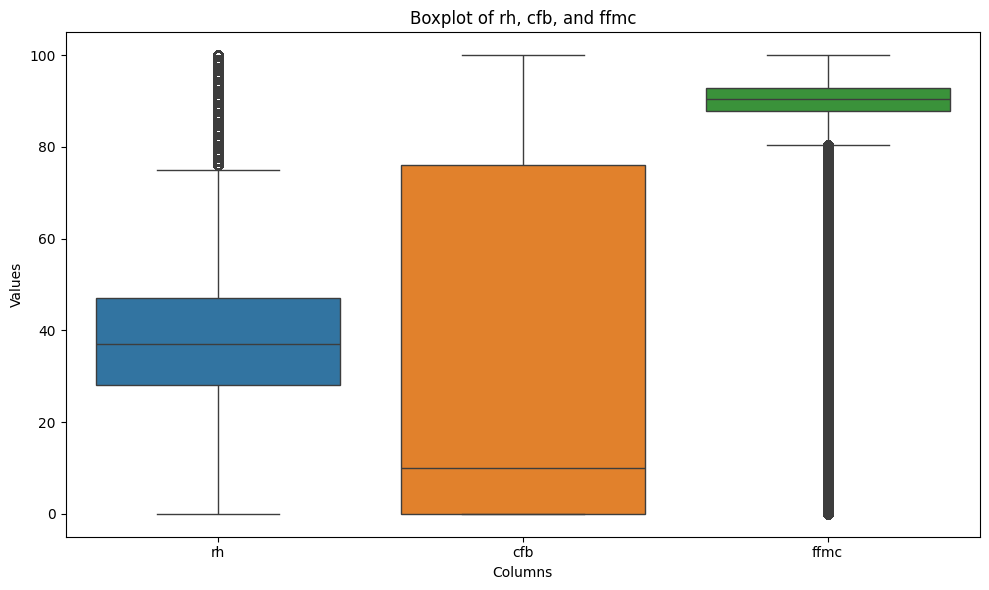

In [36]:
# Select only the columns you want for the boxplot: 'rh','cfb','ffmc'
columns_to_plot = ['rh','cfb','ffmc']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of rh, cfb, and ffmc')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__- Relative Humidity:__ there are some outliers between 60 to 100%. Its value is expressed as a percentage, typically ranging from 0% to 100%. Thus, the outliers are in the correct valide range.

__- Crown Fraction Burned:__ does not have any outliers.

__-The Fine Fuel Moisture Code:__ The FFMC valid ranges can go from 0 to 101, with higher values indicating drier and more flammable conditions. There are several outliers from 0 to 80. Nevertheless, they are in a valid range.

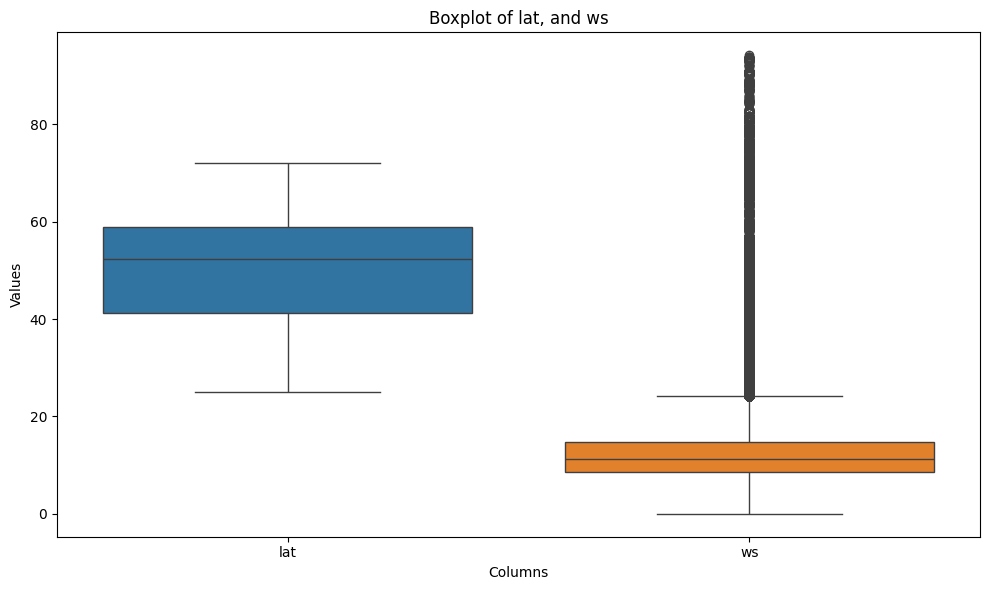

In [37]:
# Select only the columns you want for the boxplot: 'rh','cfb','ffmc'
columns_to_plot = ['lat','ws']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of lat, and ws')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__- Lattitude:__ there are not outliers in the graph. The latitude coordinates of BC (British Columbia,) should be between 48 and 70 degrees. 

__- Wind Speed:__ there are some outliers from 20 to 60. In some weather conditions, the maximum wind speeds are between 72-108 km/h. The outliers are in the valid range. It can go from 0 (calm) to 118 (hurricane) km/h approximately. But since there are no hurricanes in B.C. it should not reach 118.

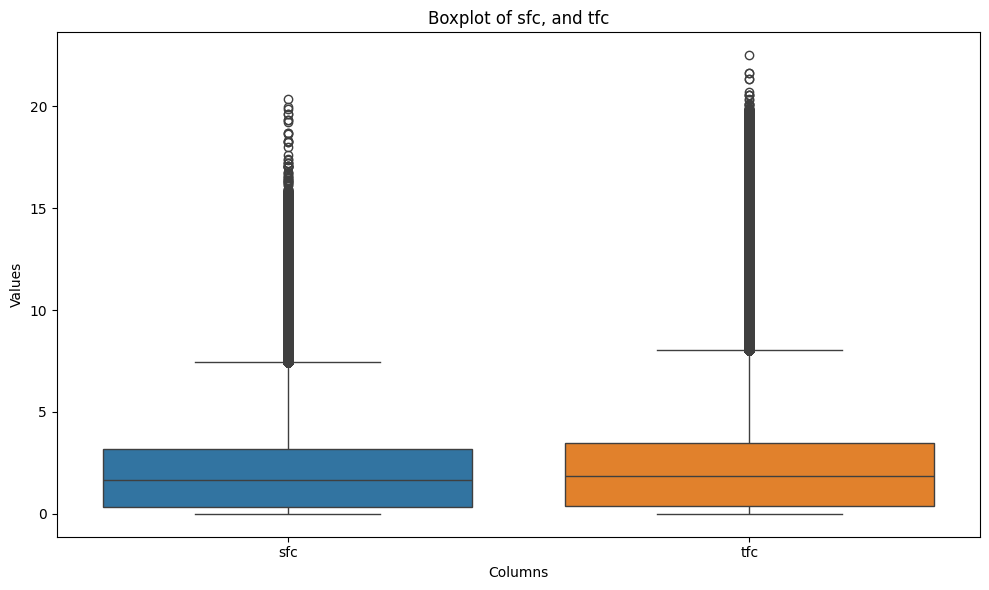

In [38]:
columns_to_plot = ['sfc','tfc']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of sfc, and tfc')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__-Surface Fuel Consumption:__ It can go from 0 (the vegetation remains unaffected) to more than 8 Kg/m² (extreme fire conditions, leaving the land without vegetation). We see some outliers between 8 and 20, since the data is about fires, it is within the valid range.

__-Total Fuel Consumption:__ It can go from to more than 15 Kg/m². 

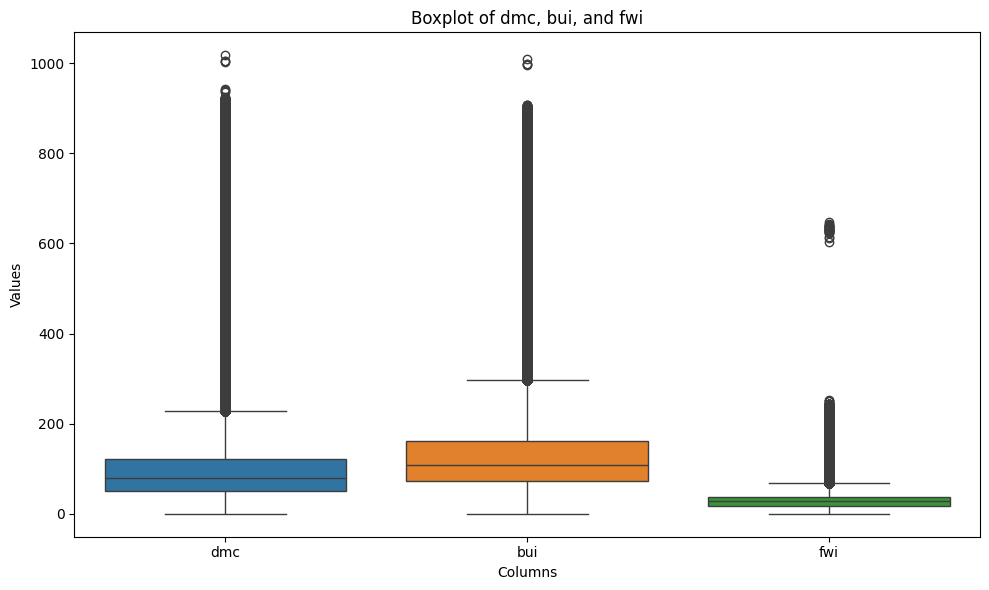

In [39]:
columns_to_plot = ['dmc','bui','fwi']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of dmc, bui, and fwi')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__-Duff Moisture Code:__ The DMC ranges can go from 0 to 1000. In the graph, we identify some outliers from 200 to 1000. These outliers indicate that the fire became more extreme and difficult to control.

__-Buildup Index:__ The BUI ranges from can go from 0 to infinity. The outliers are between 300 to 1000. These outliers indicate a large amount fuel, which can cause more intense fires.

__-Fire Weather Index:__ the values of FWI typically range between 0 and 500, though it can exceeed 500 in certain conditions, especially in regions with dry, windy, and hot weather (in this case, for fires). We can visualize outliers from 100 to 700 approximately, these outliers suggest there were critical conditions where fires started easily, spread rapidly, and had an intense behavior.

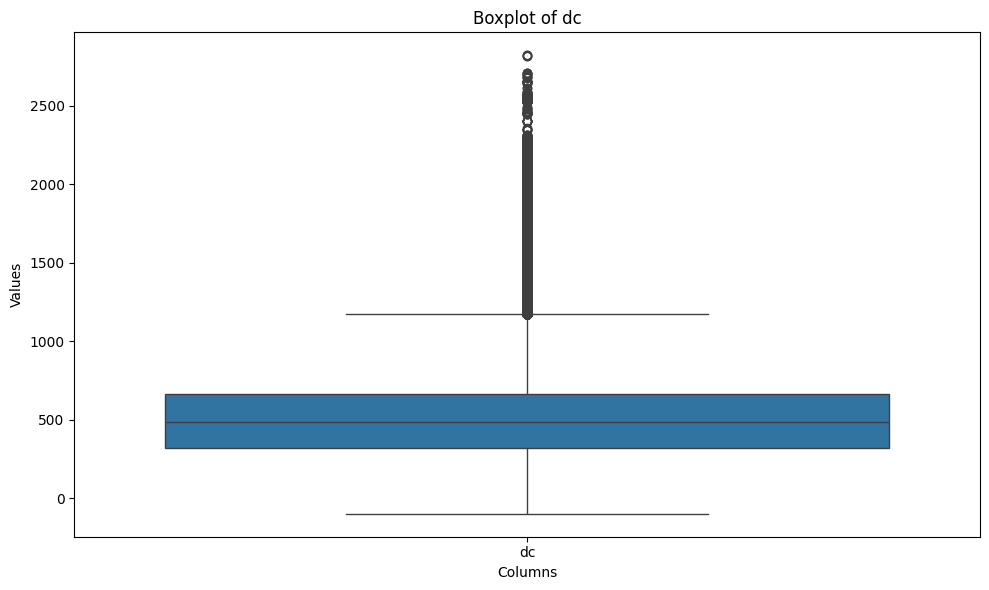

In [40]:
columns_to_plot = ['dc']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of dc')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__-Drought Code:__ The maximum drought code value of 2700 indicates extremely dry soil conditions, where moisture content is minimal. This can cause a rapid fire to spread, leading to high fire danger. The valid range for Drought Code (DC) is 0 to 1000, for values that exceed the maximum, it may be necessary to leave them at 1000, since a range greater than 1000 is not possible.


In [41]:
# For values that exceed 1000 in dc, replace them 1000
combined_data['dc'] = combined_data['dc'].apply(lambda x: 1000 if x > 1000 else x)
print(combined_data['dc'].describe())

count    1.086070e+07
mean     5.045249e+02
std      2.536962e+02
min     -9.900000e+01
25%      3.226250e+02
50%      4.865210e+02
75%      6.642390e+02
max      1.000000e+03
Name: dc, dtype: float64


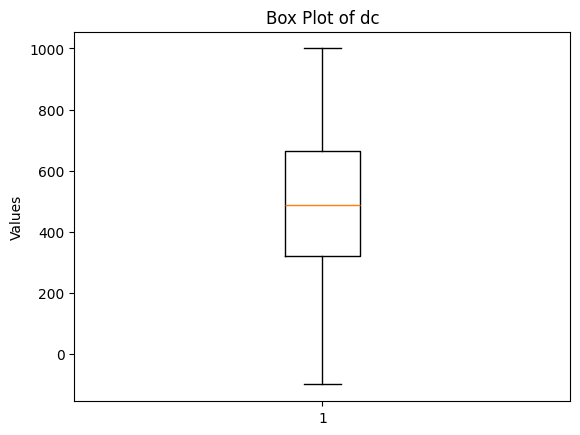

In [42]:
plt.boxplot(combined_data['dc'])
plt.title('Box Plot of dc')
plt.ylabel('Values')
plt.show()

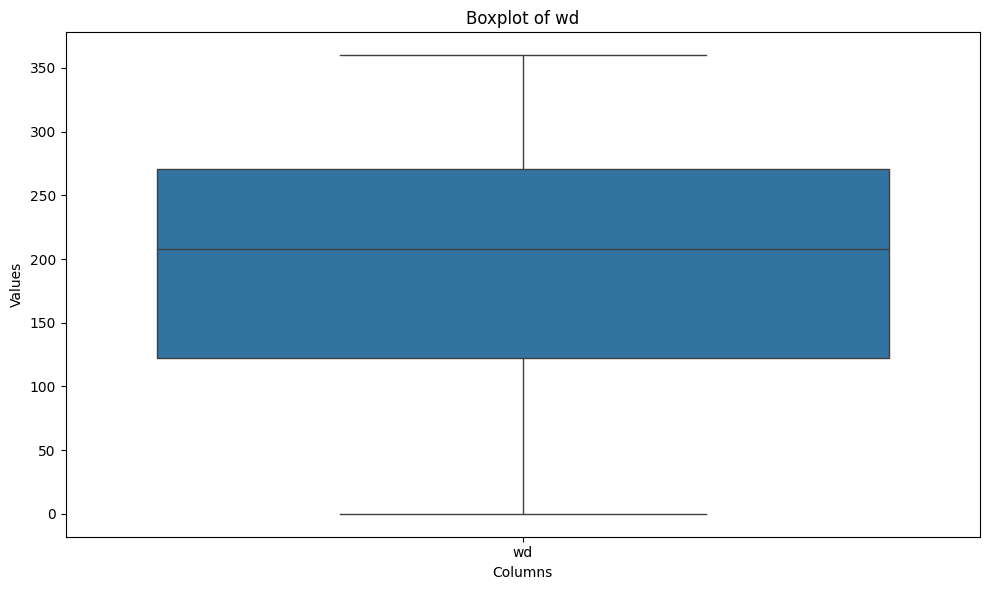

In [43]:
columns_to_plot = ['wd']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of wd')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__-Wind direction:__ The wind direction can go form 0 degrees to 360 degrees. There are no outliers in the graph.

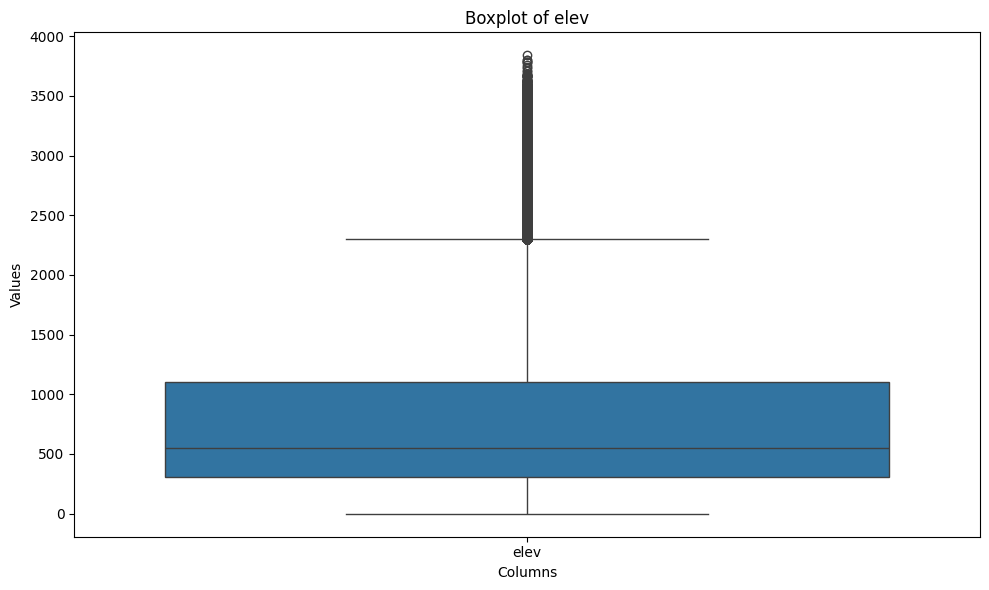

In [44]:
columns_to_plot = ['elev']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of elev')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__-Elevation:__ The elevation in B.C. can go from the sea level 0 meters to over 4,000 meters (13,000 feet), because of the mountains. So the outliers are within the valid range

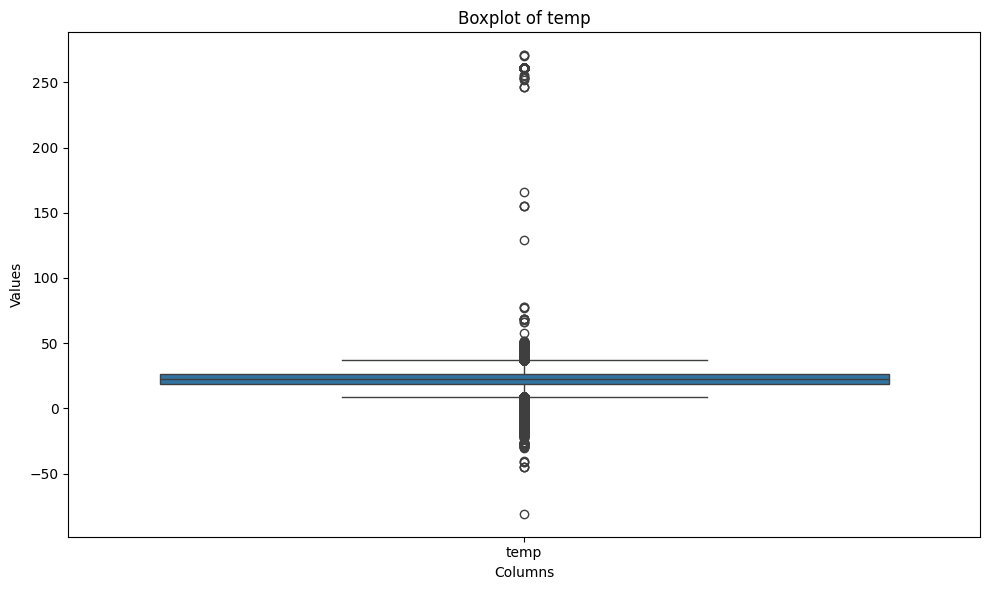

In [45]:
columns_to_plot = ['temp']
data_to_plot = data_filtered[columns_to_plot]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

plt.title('Boxplot of temp')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

__-Temperature:__ we can see some temperatures go below zero, which is an accurate temperature, because the lowest that B.C. has reached is –48.4°. However we see some values reaching 250. For a fire weather index that tracks ambient temperature, a temperature of 200°C would likely be an extreme and unrealistic value, as it would imply extremely hot conditions not typical for the environment around a wildfire. Thus for this column, the values that exceed the 200°C will be replace with the maximum value of 200°C and the same for the minimum

In [46]:
# For values that exceed 200 in temp, replace them 200
combined_data['temp'] = combined_data['temp'].apply(lambda x: 200 if x > 200 else x)

# For values that are below 49 in temp, replace them with 49
combined_data['temp'] = combined_data['temp'].apply(lambda x: -49 if x < -49 else x)

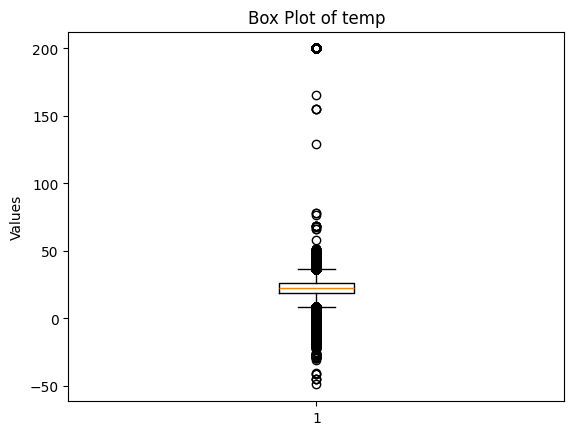

In [47]:
plt.boxplot(combined_data['temp'])
plt.title('Box Plot of temp')
plt.ylabel('Values')
plt.show()

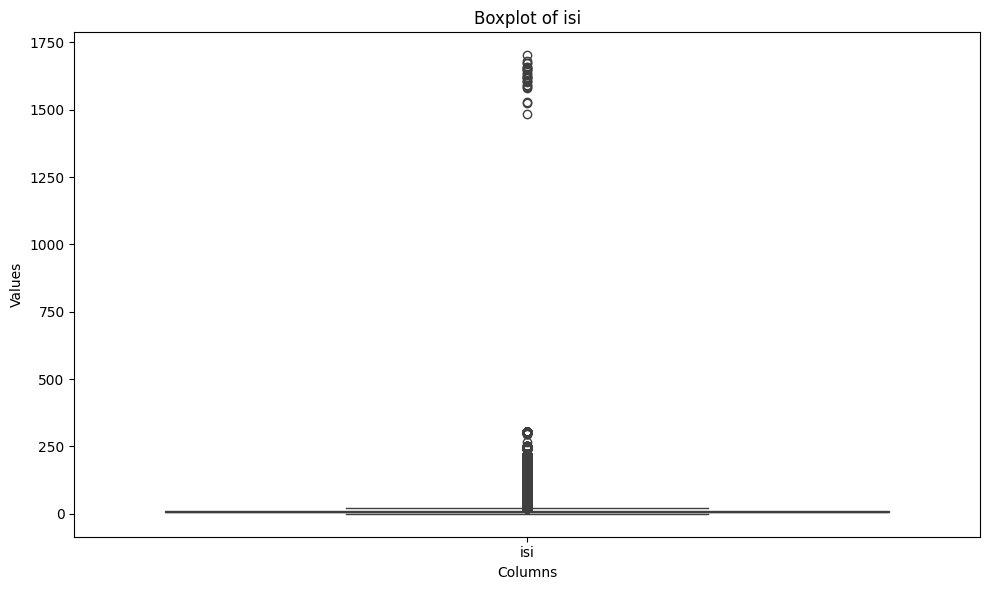

In [48]:
columns_to_plot = ['isi']
data_to_plot = data_filtered[columns_to_plot]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

plt.title('Boxplot of isi')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

__-Initial Spread Index:__ The ISI is used to quantify the expected rate of fire spread. It depends on factors such as the Fine Fuel Moisture Code (FFMC), wind speed (WS), temperature, etc. Since we already checked the valid range for all those variables, the ISI should be correct. The ISI ranges can go from 0 (there is no spread) to infinity (high spread).

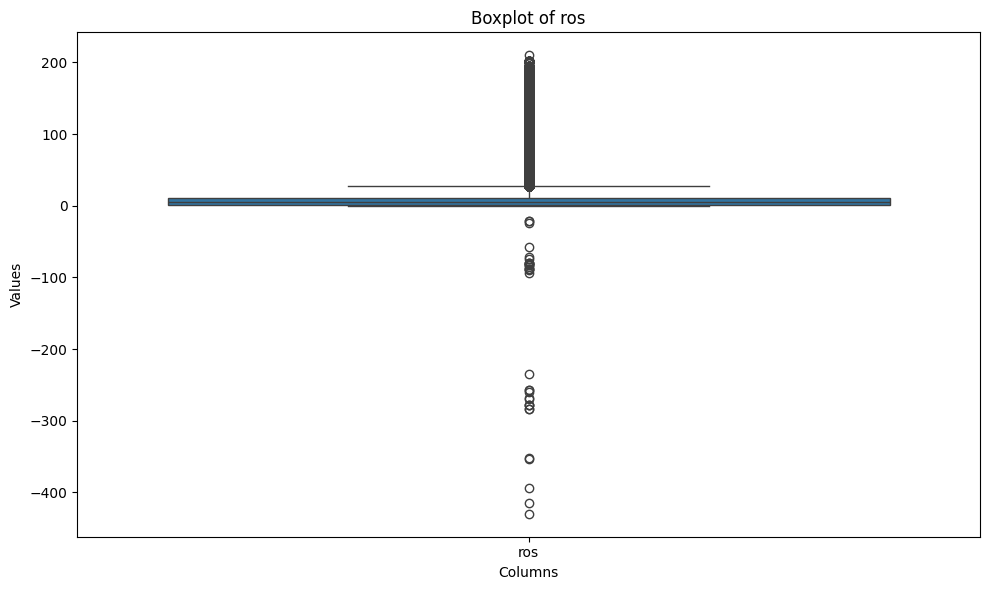

In [49]:
columns_to_plot = ['ros']
data_to_plot = data_filtered[columns_to_plot]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

plt.title('Boxplot of ros')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [50]:
# For values that are below 0 in ros, replace with 0
combined_data['ros'] = combined_data['ros'].apply(lambda x: 0 if x < 0 else x)

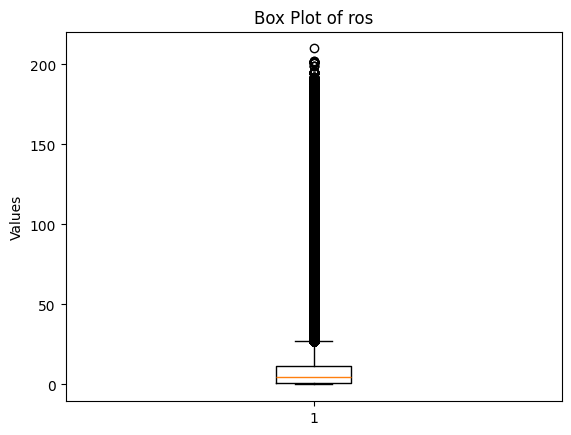

In [51]:
plt.boxplot(combined_data['ros'])
plt.title('Box Plot of ros')
plt.ylabel('Values')
plt.show()

__-Rate of spread:__ we see some negative outliers in the graph. A rate of spread cannot be negative in the context of fire behavior, because it refers to the speed at which a wildfire or fire front advances across the landscape. These outliers will be replaced with 0, since that is the minimum rate of spread. Based that we have these values in meters per minute, the range can go from 0 to more than 500 m/min. There cannot be negative in its values. Thus for the negactive values we will replace them with 0.

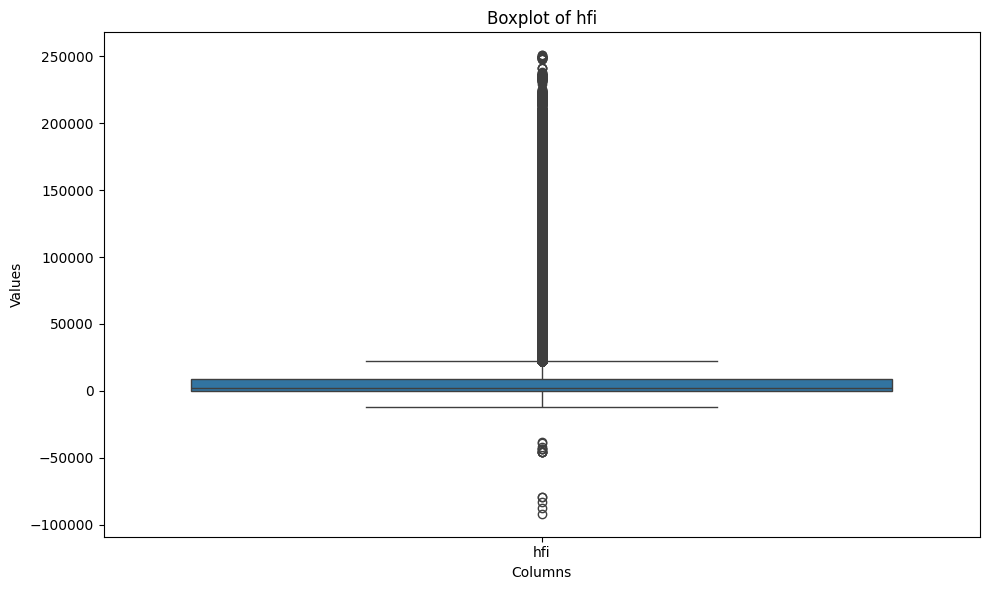

In [52]:
columns_to_plot = ['hfi']
data_to_plot = data_filtered[columns_to_plot]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

plt.title('Boxplot of hfi')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

__-Head Fire Intensity:__ Typically, it can go from 0 to to 10,000 kW/m or more, depending on the fire behavior and fuel conditions. There cannot be negative values.

In [53]:
# For values that are below 0 in hfi, replace with 0
combined_data['hfi'] = combined_data['hfi'].apply(lambda x: 0 if x < 0 else x)

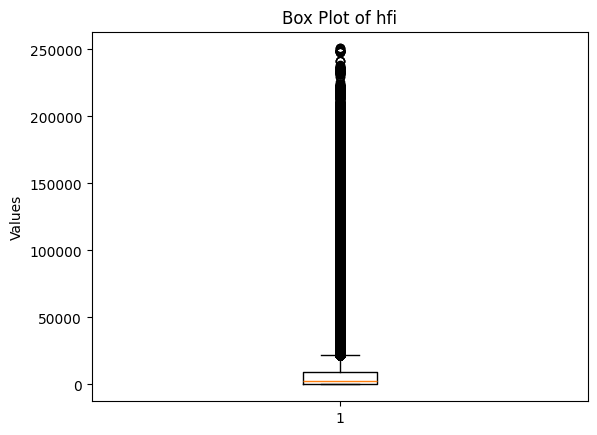

In [54]:
plt.boxplot(combined_data['hfi'])
plt.title('Box Plot of hfi')
plt.ylabel('Values')
plt.show()

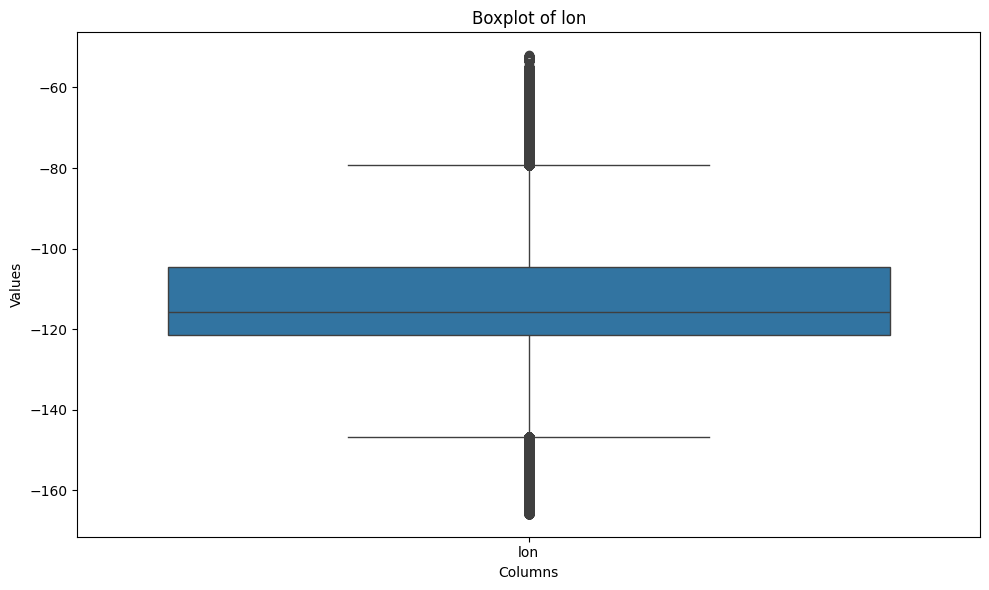

In [55]:
columns_to_plot = ['lon']
data_to_plot = data_filtered[columns_to_plot]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

plt.title('Boxplot of lon')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

__-Longitude:__ we can visualize some outliers from –160 to –140.  These values are valid, as they likely correspond to locations on the edges of BC. It’s possible that the fire originated in British Columbia and then spread into these atypical areas, leading to the observed longitude values.

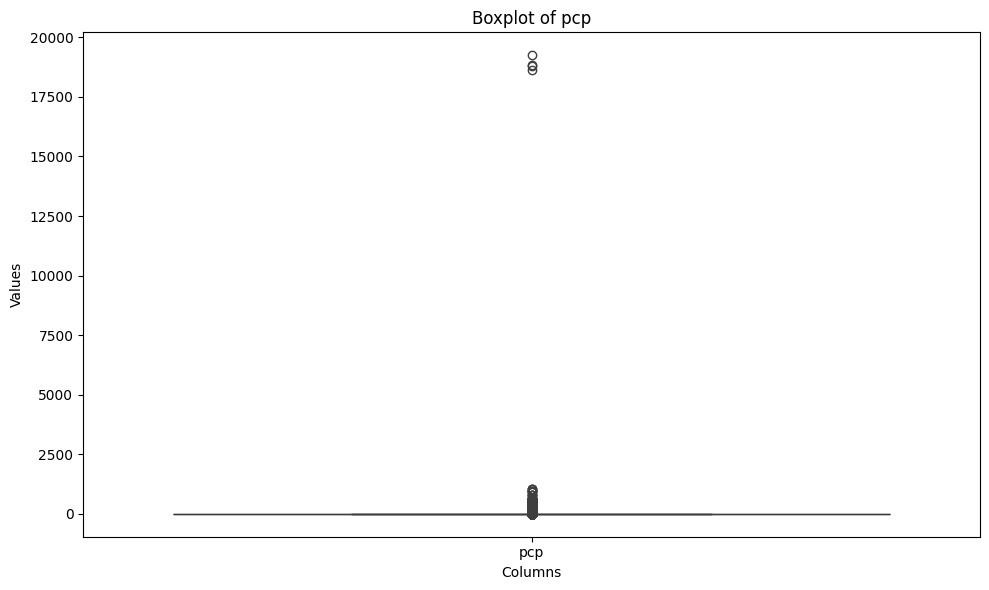

In [56]:
columns_to_plot = ['pcp']
data_to_plot = data_filtered[columns_to_plot]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

plt.title('Boxplot of pcp')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

__-Precipitation:__ BC's precipitation changes depending on the season. It is during the winter and lower in the summer. Annual precipitation totals can range from less than 300 mm in some interior valleys.

In BC, it is possible for precipitation to exceed 1,000 mm in certain areas, particularly in regions with heavy rainfall due to topography and climatic conditions. While BC is known for its wet climate, especially along the coast. The record for the greatest rainfall in 24 hours in BC is 489.2 millimeters in Ucluelet Brynnor Mine

However, 20,000 mm (or 20 meters) in a single day is not realistic, even for the wettest areas on Earth. While British Columbia (BC) is known for its heavy rainfall, especially in coastal regions, daily rainfall totals of this magnitude are highly unlikely.This number is highly inlikely. Therefore it must be changed. For this case, considering the previous information, the maximum value for this column will be 1,000

In [57]:
# For values that are above 1000 in pcp, replace with 1000
combined_data['pcp'] = combined_data['pcp'].apply(lambda x: 1000 if x > 1000 else x)

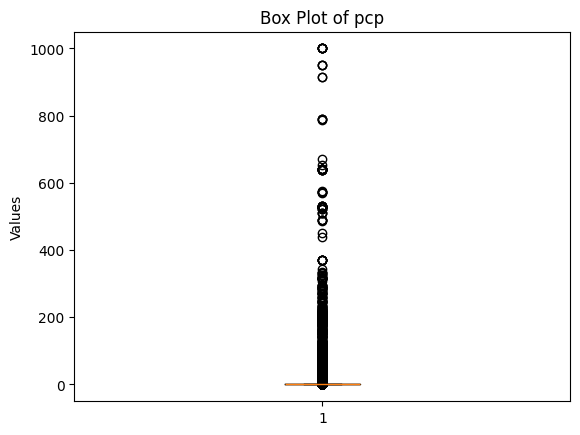

In [58]:
plt.boxplot(combined_data['pcp'])
plt.title('Box Plot of pcp')
plt.ylabel('Values')
plt.show()

# Export clean file to a CSV File

In [59]:
combined_data.to_csv('clean_data.csv', index=False)

# Grouping and selecting

First we start selecting and filtering using two columns

In [60]:
# First we want to filter just the rows from British Columbia with the variable "agency"
combined_bc = combined_data[combined_data['agency']=='BC']

# Also, we can have BC and ON
combined_bc_on = combined_data[(combined_data['agency']=='BC')|(combined_data['agency']=='ON')]

# Unique values from 'source'
unique_values_source = combined_data['sensor'].unique()
print(unique_values_source)

# We can create different groups based on the differents sensor and British Columbia 
combined_bc_AVHRR = [(combined_data['agency']=='BC')&(combined_data['sensor']=='AVHRR')]
combined_bc_IBAND = [(combined_data['agency']=='BC')&(combined_data['sensor']=='IBAND')]
combined_bc_Landsat = [(combined_data['agency']=='BC')&(combined_data['sensor']=='Landsat')]
combined_bc_MODIS = [(combined_data['agency']=='BC')&(combined_data['sensor']=='MODIS')]
combined_bc_OLI = [(combined_data['agency']=='BC')&(combined_data['sensor']=='OLI')]
combined_bc_VIIRS = [(combined_data['agency']=='BC')&(combined_data['sensor']=='VIIRS')]
combined_bc_VIRRS_I = [(combined_data['agency']=='BC')&(combined_data['sensor']=='VIRRS-I')]
combined_bc_VIRRS_M = [(combined_data['agency']=='BC')&(combined_data['sensor']=='VIRRS-M')]



['VIIRS', 'AVHRR', 'MODIS', 'IBAND', 'Landsat', 'VIIRS-M', 'VIIRS-I', 'OLI']
Categories (8, object): ['AVHRR', 'IBAND', 'Landsat', 'MODIS', 'OLI', 'VIIRS', 'VIIRS-I', 'VIIRS-M']


Then, we started grouping and detecting mean values for numerical variables

In [61]:
grouped = combined_data['temp'].groupby(combined_data['sensor'])
grouped.mean()

/var/folders/jx/psp7f4jd6yj35lm7000kqtph0000gn/T/ipykernel_27989/2640286929.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = combined_data['temp'].groupby(combined_data['sensor'])


sensor
AVHRR      22.480497
IBAND      22.656935
Landsat    22.724892
MODIS      22.537528
OLI        19.879624
VIIRS      22.613567
VIIRS-I    21.942678
VIIRS-M    22.228976
Name: temp, dtype: float64

We can see here that temperatures were pretty similar in average with the exception of the sensor OLI

Also, we grouped with two different variables (source and sensor):

In [62]:
means = combined_data['temp'].groupby([combined_data['sensor'], combined_data['source']]).mean()
means = means.dropna()
means

/var/folders/jx/psp7f4jd6yj35lm7000kqtph0000gn/T/ipykernel_27989/2517469825.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = combined_data['temp'].groupby([combined_data['sensor'], combined_data['source']]).mean()


sensor   source  
AVHRR    NOAA        22.480497
IBAND    NASA        22.637815
         NASA1       21.368566
         NASA2       28.860906
         NASA3       21.325619
         NASA4       14.295315
         NASA5       15.491712
         NASA6       26.693141
         NASA7       26.469697
         USFS        21.150248
Landsat  USFS        22.724892
MODIS    NASA        21.860371
         NASA_ak     18.588408
         NASA_can    19.612265
         NASA_usa    20.005236
         NASAkmz     28.744351
         NASAwak     18.695696
         NASAwcan    21.868212
         NASAwusa    30.361936
         NOAA        20.550042
         USFS        23.885489
OLI      USFS        19.879624
VIIRS    NOAA        23.041410
         UMD         22.856906
         USFS        22.432996
VIIRS-I  HMS         15.927670
         NASA1       17.636730
         NASA2       21.587309
         NASA3       21.685691
         NASA4       18.650303
         NASA5       18.657069
         NASA6       

We can also look the summary statistics of the variable 'temp' by sensor with the group that we created before:

In [63]:
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
sensor,,,,,,,,
AVHRR,576262.0,22.480497,7.174314,-18.900000,19.233999,23.000000,26.238001,200.000000
IBAND,2068814.0,22.656935,5.548948,-19.423000,19.941999,23.134001,26.115000,48.417999
Landsat,10107.0,22.724892,3.834236,3.688000,20.980500,22.698999,24.847500,35.073002
MODIS,2006671.0,22.537528,7.653471,-49.000000,18.900000,23.097000,26.947001,200.000000
OLI,4290.0,19.879624,6.421840,-0.353000,15.130750,20.797001,25.967750,32.924000
VIIRS,652063.0,22.613567,8.300351,-21.349001,18.909000,23.301001,26.989000,200.000000
VIIRS-I,5472687.0,21.942678,5.873408,-45.266998,18.724001,22.309000,25.729000,77.917000
VIIRS-M,69810.0,22.228976,7.789825,-16.073999,16.595250,22.964500,27.915751,43.064999


# Matplots visualization

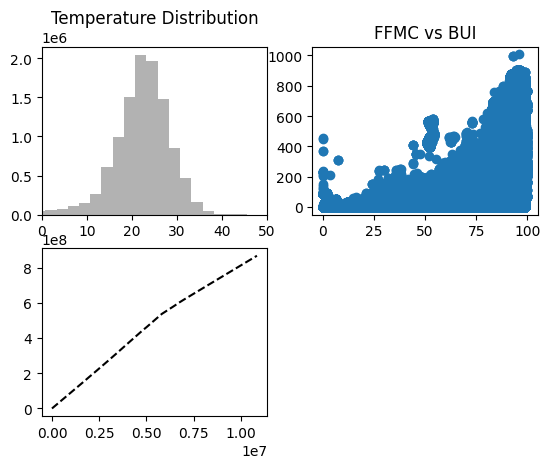

In [64]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(combined_data['temp'], bins=100, color='k', alpha=0.3)
ax1.set_xlim(0, 50)
ax1.set_title('Temperature Distribution')
ax2.scatter(combined_data['ffmc'],combined_data['bui'])
ax2.set_title('FFMC vs BUI')
plt.plot(combined_data['ffmc'].cumsum(), 'k--')


Histograms of all the numerical variables

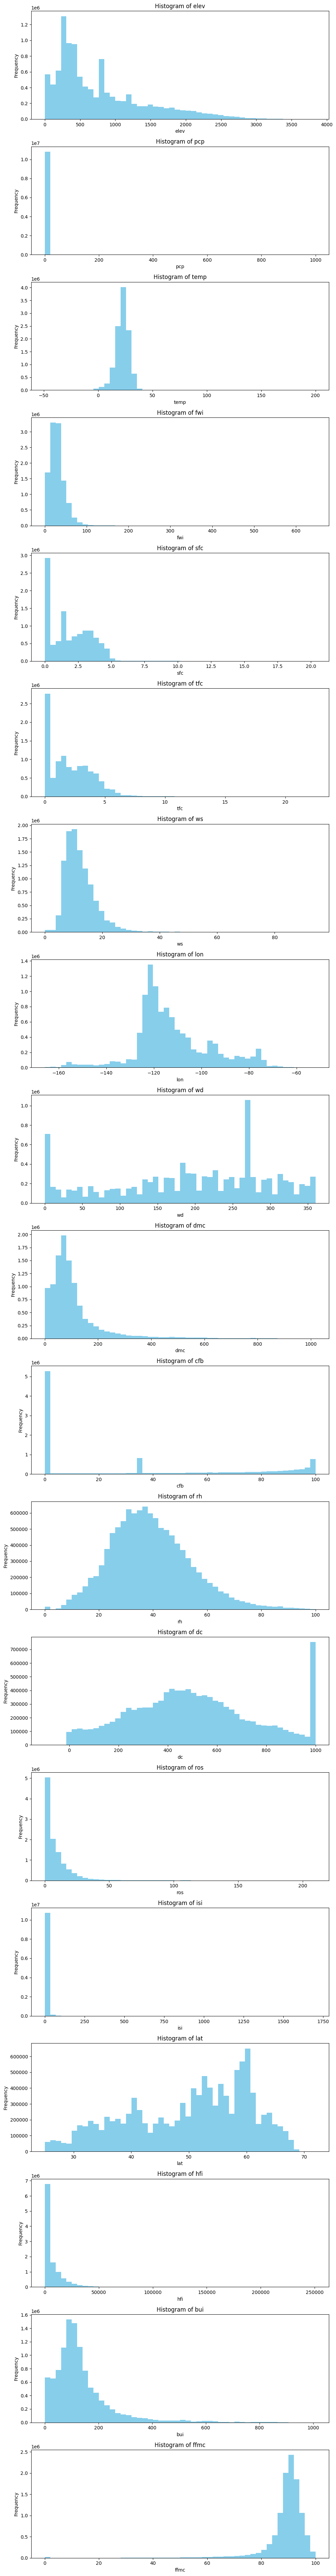

In [65]:
# Select only numerical columns
numerical_cols = combined_data.select_dtypes(include=['number']).columns

# Create subplots based on the number of numerical columns
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 4 * len(numerical_cols)))

# Iterate through numerical columns and plot histograms
for i, col in enumerate(numerical_cols):
    axes[i].hist(combined_data[col].dropna(), bins=50, color='skyblue')  
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Bar charts for categorical variables

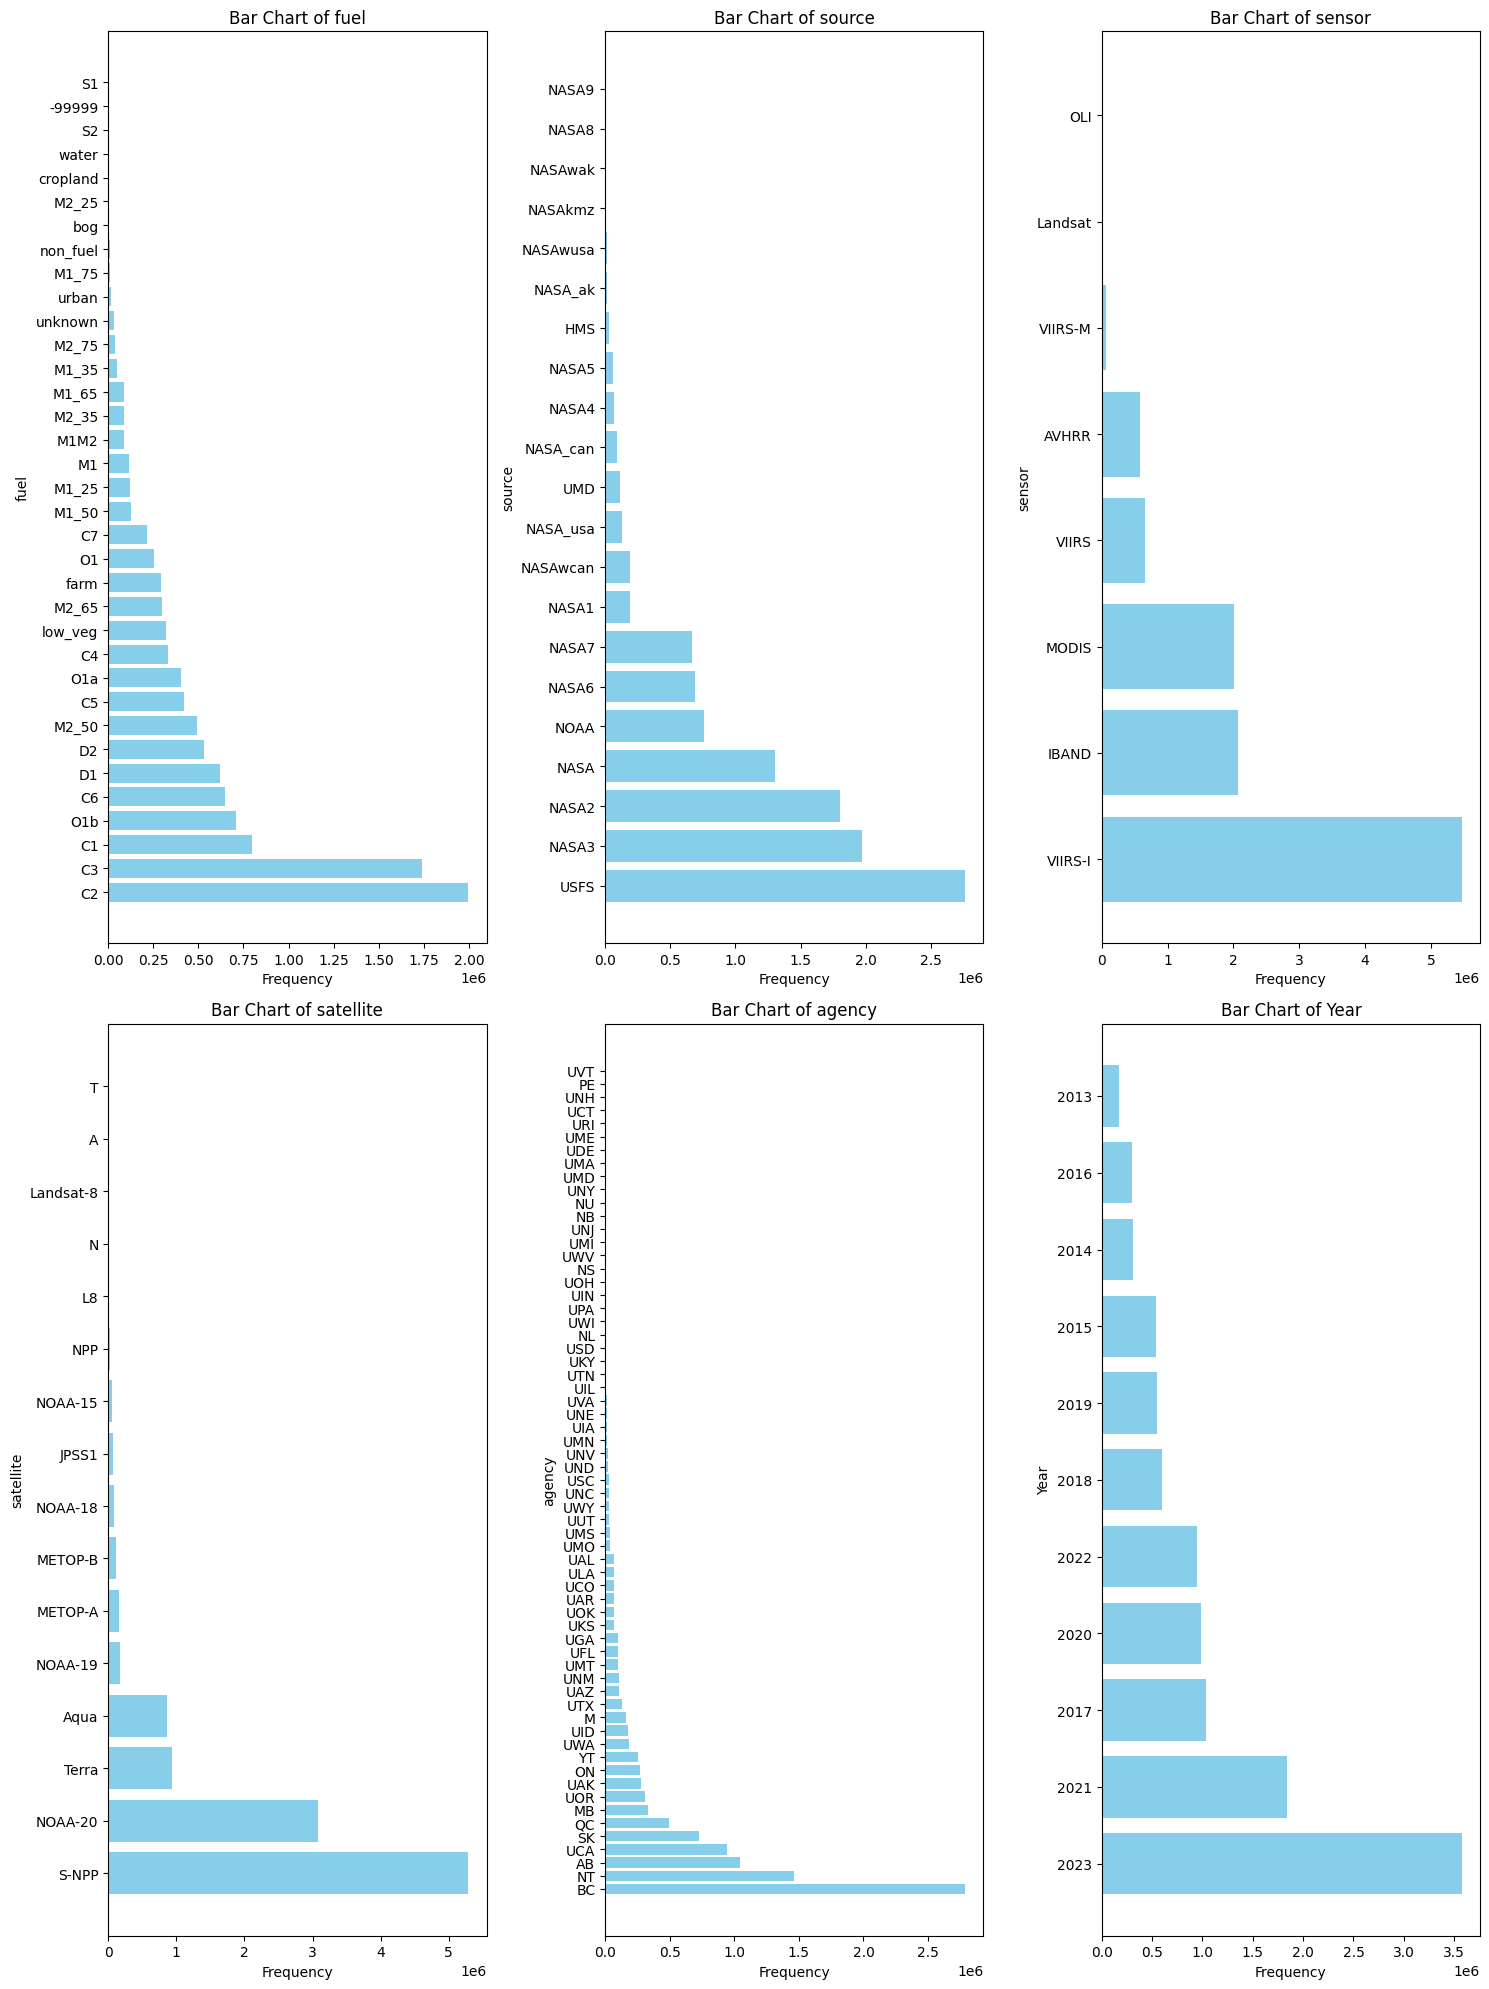

In [66]:
# Select only categorical columns
categorical_cols = combined_data.select_dtypes(include=['object', 'category']).columns
num_cols = len(categorical_cols)

# Calculate the number of rows needed for subplots
num_rows = (num_cols + 2) // 3  # Ceiling division to ensure enough rows

# Create subplots with 3 bar charts per row
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 10 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through categorical columns and plot horizontal bar charts
for i, col in enumerate(categorical_cols):
    value_counts = combined_data[col].value_counts()
    axes[i].barh(value_counts.index, value_counts.values, color='skyblue')  # Use barh for horizontal bars
    axes[i].set_title(f'Bar Chart of {col}')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel(col)  # Swap x and y labels

# Hide any extra empty subplots
for i in range(num_cols, num_rows * 3):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

We can also see that the mean temperature is decreasing every year with the exception of the first two years of COVID-19

/var/folders/jx/psp7f4jd6yj35lm7000kqtph0000gn/T/ipykernel_27989/3833119451.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_temp_by_year = combined_data.groupby('Year')['temp'].mean()


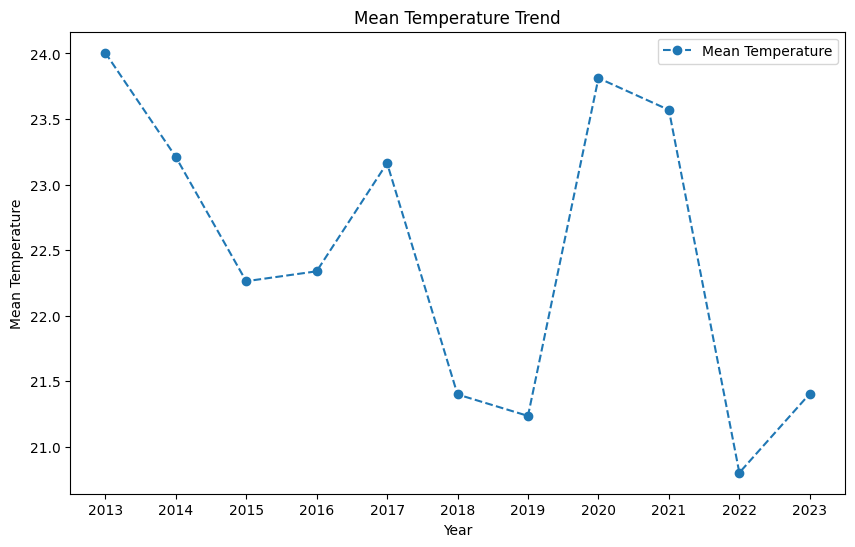

In [67]:
# Calculate mean temperature by year
mean_temp_by_year = combined_data.groupby('Year')['temp'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean temperature trend
ax.plot(mean_temp_by_year.index, mean_temp_by_year.values, label='Mean Temperature', linestyle='--', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Mean Temperature')
ax.set_title('Mean Temperature Trend')
ax.legend()
plt.show()

Then we do the mean of all the numerical variables in all the years with line charts

/var/folders/jx/psp7f4jd6yj35lm7000kqtph0000gn/T/ipykernel_27989/1829752013.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_year = combined_data.groupby('Year')[col].mean()


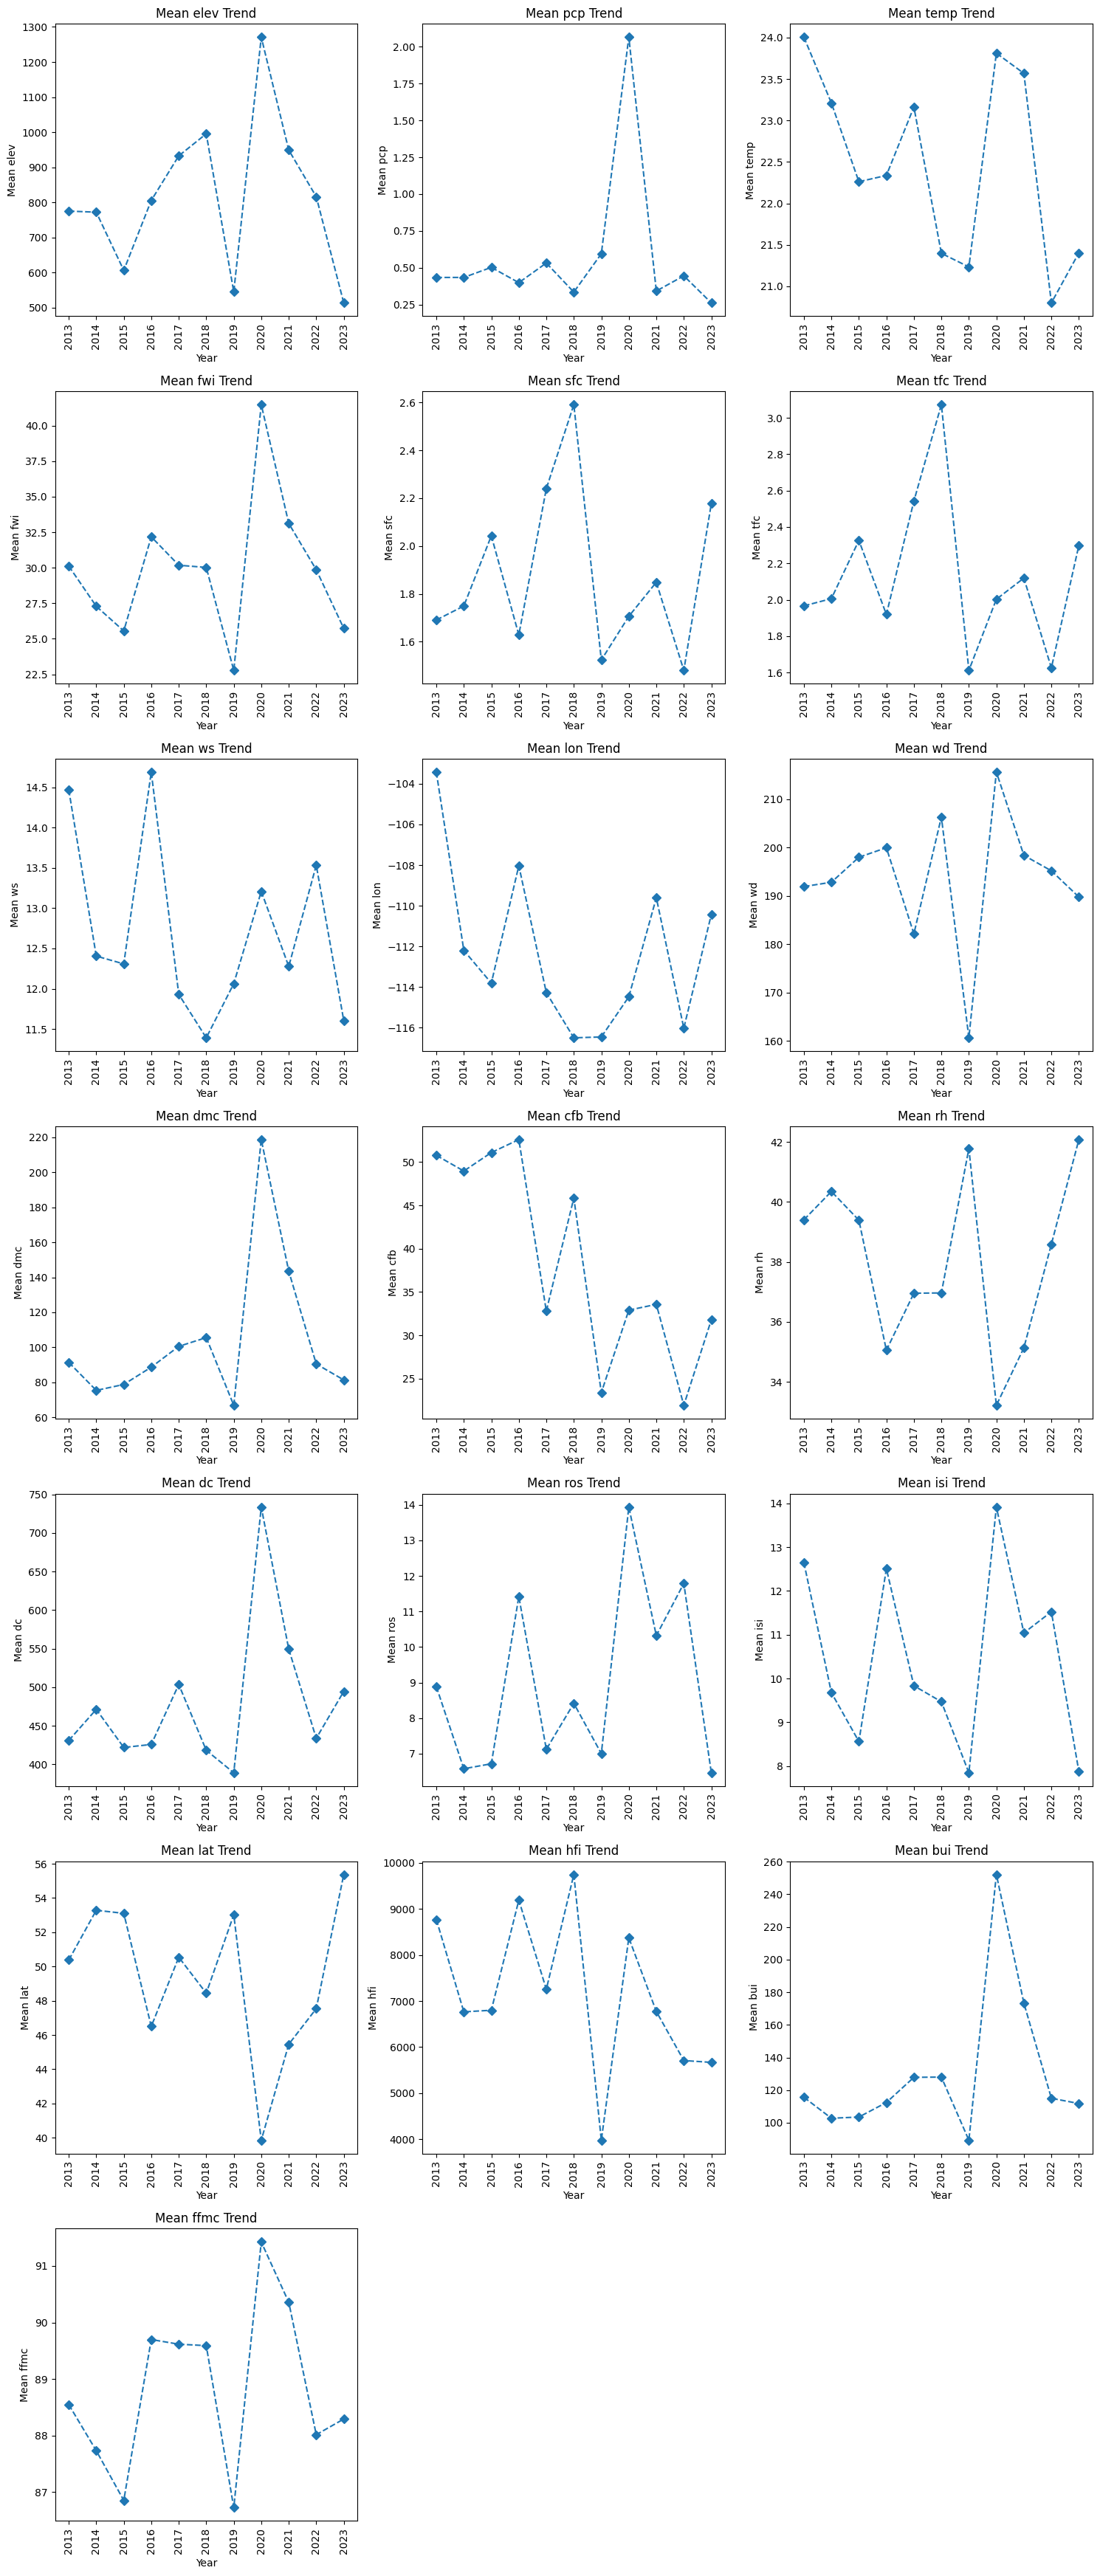

In [68]:
# Select only numerical columns
numerical_cols = combined_data.select_dtypes(include=['number']).columns
num_cols = len(numerical_cols)

# Calculate the number of rows needed for subplots (3 columns per row)
num_rows = (num_cols + 2) // 3

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten for easier iteration

# Iterate through numerical columns and plot line charts
for i, col in enumerate(numerical_cols):
    mean_by_year = combined_data.groupby('Year')[col].mean()
    axes[i].plot(mean_by_year.index, mean_by_year.values, linestyle='--', marker='D')
    axes[i].set_title(f'Mean {col} Trend')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(f'Mean {col}')
    axes[i].tick_params(axis='x', rotation=90)

# Hide any extra empty subplots
for i in range(num_cols, num_rows * 3):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Join from another dataset

Creating a dataframe with the mean temperatures by year from hotspots dataset and use join outer method to add the total rain by year from another dataset.

In [69]:
weather = pd.read_csv('./data/weather_data/weather.csv')

/var/folders/jx/psp7f4jd6yj35lm7000kqtph0000gn/T/ipykernel_27989/3543021433.py:1: DtypeWarning: Columns (8,10,15,17,19,21,23,25,27,29,31,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv('./data/weather_data/weather.csv')


In [70]:
# Calculate mean temperature by year for combined_data
mean_temp_combined = combined_bc.groupby('Year')['temp'].mean()

# Calculate total rain from other dataset
sum_total_rain = weather.groupby('year')['total_rain'].sum()  # Use 'year' (lowercase)

# Rename the index of mean_temp_combined to 'year' (lowercase)
mean_temp_combined.index.name = 'year'  

# Ensure both 'year' indices are of the same data type (e.g., integer)
mean_temp_combined.index = mean_temp_combined.index.astype(int)  
sum_total_rain.index = sum_total_rain.index.astype(int)

# Join using an outer join
merged_mean_temp = mean_temp_combined.to_frame(name='combined_data_temp').join(
    sum_total_rain.to_frame(name='weather_total_rain'), how='outer')

# Display the merged DataFrame
print(merged_mean_temp)

      combined_data_temp  weather_total_rain
year                                        
2013           26.034183                 NaN
2014           24.254360            202451.2
2015           22.296617            188663.6
2016           22.905115            196961.6
2017           23.585034            155976.4
2018           20.328573            148492.0
2019           14.230235            118702.6
2020           22.602104            162881.8
2021           24.704261            152789.6
2022           17.640422            112534.0
2023           20.689467            107173.0
2024                 NaN             53522.6


/var/folders/jx/psp7f4jd6yj35lm7000kqtph0000gn/T/ipykernel_27989/2125146990.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_temp_combined = combined_bc.groupby('Year')['temp'].mean()


Now we can show just the ones that match 


In [71]:
# Filter to keep only rows WITHOUT any NaN values
merged_mean_temp_no_na = merged_mean_temp.dropna()

# Display the filtered DataFrame
print(merged_mean_temp_no_na)

      combined_data_temp  weather_total_rain
year                                        
2014           24.254360            202451.2
2015           22.296617            188663.6
2016           22.905115            196961.6
2017           23.585034            155976.4
2018           20.328573            148492.0
2019           14.230235            118702.6
2020           22.602104            162881.8
2021           24.704261            152789.6
2022           17.640422            112534.0
2023           20.689467            107173.0


We can also use inner method instead of droping NA values:

In [72]:
# Join using an inner join
merged_mean_temp2 = mean_temp_combined.to_frame(name='combined_data_temp').join(
    sum_total_rain.to_frame(name='weather_total_rain'), how='inner')  # Change to 'inner')

# Display the merged DataFrame
print(merged_mean_temp2)

      combined_data_temp  weather_total_rain
year                                        
2014           24.254360            202451.2
2015           22.296617            188663.6
2016           22.905115            196961.6
2017           23.585034            155976.4
2018           20.328573            148492.0
2019           14.230235            118702.6
2020           22.602104            162881.8
2021           24.704261            152789.6
2022           17.640422            112534.0
2023           20.689467            107173.0


We can also use the concat method:

In [73]:
# Concatenate the Series along axis=1 (columns)
merged_mean_temp3 = pd.concat(
    [mean_temp_combined, sum_total_rain], 
    axis=1, 
    keys=['combined_data_temp', 'weather_total_rain']
)

# Filter to keep only rows WITHOUT any NaN values
merged_mean_temp_no_na2 = merged_mean_temp3.dropna()

# Display the filtered DataFrame
print(merged_mean_temp_no_na2)


      combined_data_temp  weather_total_rain
year                                        
2014           24.254360            202451.2
2015           22.296617            188663.6
2016           22.905115            196961.6
2017           23.585034            155976.4
2018           20.328573            148492.0
2019           14.230235            118702.6
2020           22.602104            162881.8
2021           24.704261            152789.6
2022           17.640422            112534.0
2023           20.689467            107173.0


We also can do it using keys:

In [74]:
pd.concat([mean_temp_combined, sum_total_rain], axis=0, sort=False, keys=['Hotspots_Mean_Temp', 'Weather_Total_rain'])

                    year
Hotspots_Mean_Temp  2013        26.034183
                    2014        24.254360
                    2015        22.296617
                    2016        22.905115
                    2017        23.585034
                    2018        20.328573
                    2019        14.230235
                    2020        22.602104
                    2021        24.704261
                    2022        17.640422
                    2023        20.689467
Weather_Total_rain  2014    202451.200000
                    2015    188663.600000
                    2016    196961.600000
                    2017    155976.400000
                    2018    148492.000000
                    2019    118702.600000
                    2020    162881.800000
                    2021    152789.600000
                    2022    112534.000000
                    2023    107173.000000
                    2024     53522.600000
dtype: float64

We also name the created axis levels:

In [75]:
pd.concat([mean_temp_combined, sum_total_rain], axis=0, sort=False, keys=['Hotspots_Mean_Temp', 'Weather_Total_rain'],names=['Datasets and object', 'Year'])

Datasets and object  Year
Hotspots_Mean_Temp   2013        26.034183
                     2014        24.254360
                     2015        22.296617
                     2016        22.905115
                     2017        23.585034
                     2018        20.328573
                     2019        14.230235
                     2020        22.602104
                     2021        24.704261
                     2022        17.640422
                     2023        20.689467
Weather_Total_rain   2014    202451.200000
                     2015    188663.600000
                     2016    196961.600000
                     2017    155976.400000
                     2018    148492.000000
                     2019    118702.600000
                     2020    162881.800000
                     2021    152789.600000
                     2022    112534.000000
                     2023    107173.000000
                     2024     53522.600000
dtype: float64

### Splitting Datetime into Components
In this section, we separate the datetime column into individual components: year, month, day, and time.

In [84]:
# Ensure the 'rep_date' column is in datetime format
if 'rep_date' in combined_data.columns:
    combined_data['rep_date'] = pd.to_datetime(combined_data['rep_date'], format="%Y/%m/%d %H:%M:%S.%f")

# Create separate columns for year, month, day, and time
combined_data['Year'] = combined_data['rep_date'].dt.year
combined_data['Month'] = combined_data['rep_date'].dt.month
combined_data['Day'] = combined_data['rep_date'].dt.day
combined_data['Time'] = combined_data['rep_date'].dt.time

# Create a 'Week' column using isocalendar() method to extract the ISO week number
combined_data['Week'] = combined_data['rep_date'].dt.isocalendar().week

# Display the updated DataFrame structure
combined_data.head()

,elev,fuel,pcp,temp,fwi,rep_date,sfc,tfc,ws,lon,wd,dmc,source,cfb,rh,dc,sensor,satellite,ros,agency,isi,lat,hfi,bui,ffmc,Year,Month,Day,Time,Week
0,164.0,C1,0.000,23.289000,7.813000,2021-09-14 05:14:00,0.232937,0.232937,25.249001,-95.940002,210,14.066000,USFS,0.0,72,126.575996,VIIRS,S-NPP,0.177610,BC,4.627000,34.249001,12.0,22.016001,81.195999,2021,9,14,05:14:00,37
1,410.0,O1,0.000,21.837999,33.883999,2021-09-14 05:14:00,0.350000,0.350000,26.327000,-99.399002,220,37.959000,USFS,0.0,42,417.631989,VIIRS,S-NPP,50.509399,BC,15.848000,34.632999,5303.0,61.861000,89.865997,2021,9,14,05:14:00,37
2,1657.0,M1,0.005,26.548000,58.983002,2021-09-14 05:14:00,3.168000,3.556010,17.978001,-118.629997,271,262.731995,NOAA,97.0,32,1000.000000,AVHRR,METOP-B,18.025801,BC,18.594999,36.119999,19230.0,341.135010,93.973999,2021,9,14,05:14:00,37
3,2005.0,O1,0.000,20.930000,35.007000,2021-09-14 05:14:00,0.350000,0.350000,6.117000,-113.440002,0,153.479004,NOAA,0.0,27,526.336975,AVHRR,METOP-A,11.697800,BC,8.761000,47.340000,1228.0,177.535004,92.862999,2021,9,14,05:14:00,37
4,108.0,C1,0.000,25.981001,10.430000,2021-09-14 05:14:00,0.851895,0.851895,24.844000,-95.882004,190,17.229000,USFS,0.0,68,74.991997,MODIS,Aqua,0.634932,BC,6.505000,31.968000,162.0,21.886999,84.081001,2021,9,14,05:14:00,37


### Grouped Summaries: Weather and Fire Indices
This section calculates grouped summaries:
1. Averages of weather variables (`pcp`, `ws`, `rh`, `temp`) by year and month.
2. Weekly summaries for fire indices (`isi`, `ffmc`, `dmc`, `hfi`, `ros`, `tfc`, `bui`, `cfb`, `sfc`, `fwi`, `dc`).

In [85]:
# Weather variable averages grouped by year and month
weather_summary = combined_data.groupby(['Year', 'Month']).agg({
    'pcp': 'mean',  # Precipitation
    'ws': 'mean',   # Wind speed
    'rh': 'mean',   # Relative humidity
    'temp': 'mean'  # Temperature
}).reset_index()

# Display the weather summary
print(weather_summary)

    Year  Month       pcp         ws         rh       temp
0   2018      1  0.951838  14.902730  44.395241  10.916595
1   2018      2  1.519997  15.294394  56.339124  17.383432
2   2018      3  0.835965  17.824854  43.092478  13.760768
3   2018      4  0.321834  17.912865  34.269482  17.518558
4   2018      5  0.638684  15.636687  31.787544  23.587999
5   2018      6  0.729141  15.676793  37.730448  26.475828
6   2018      7  0.458996  11.273303  35.883658  26.977258
7   2018      8  0.072228   9.979897  36.013688  21.975995
8   2018      9  1.699278  12.698739  35.066176  21.483668
9   2018     10  0.997218  11.383924  51.820381  14.970244
10  2018     11  3.681067   5.784218  33.589408   4.754034
11  2019      3  0.978671  14.317016  44.705357  15.892136
12  2019      4  0.518080  16.882927  37.880670  18.522292
13  2019      5  0.189698  14.195585  34.672115  20.090151
14  2019      6  0.809317  13.191776  39.431593  23.823296
15  2019      7  0.598405  10.600074  44.394267  23.2218

In [86]:
# Fire indices weekly summaries
fire_indices_summary = combined_data.groupby(['Year', 'Week']).agg({
    'isi': 'mean',  # Initial Spread Index
    'ffmc': 'mean', # Fine Fuel Moisture Code
    'dmc': 'mean',  # Duff Moisture Code
    'hfi': 'mean',  # Head Fire Intensity
    'ros': 'mean',  # Rate of Spread
    'tfc': 'mean',  # Total Fuel Consumption
    'bui': 'mean',  # Buildup Index
    'cfb': 'mean',  # Crown Fraction Burned
    'sfc': 'mean',  # Surface Fuel Consumption
    'fwi': 'mean',  # Fire Weather Index
    'dc': 'mean'    # Drought Code
}).reset_index()

# Display the fire indices summary
print(fire_indices_summary)


     Year  Week        isi       ffmc         dmc           hfi        ros  \
0    2018     1   4.388262  82.128693   21.087425    263.947101   2.565064   
1    2018     2   5.115879  78.491753   46.386509    480.170667   4.565897   
2    2018     3   4.520700  81.003380   34.923950    405.701619   4.017073   
3    2018     4   5.163427  82.981476   30.251692    526.802704   4.327645   
4    2018     5   5.848186  80.508690   29.104446    719.991593   5.385870   
5    2018     6   4.438336  75.256615   48.456371    546.483774   4.622318   
6    2018     7   4.455646  80.696617   49.269382    445.677252   3.610669   
7    2018     8   5.213987  83.158524   31.366545    325.056753   2.197343   
8    2018     9   6.281333  79.911690   23.699963    845.677879   6.283669   
9    2018    10   9.139242  85.634003   27.531118   1823.168981  12.291462   
10   2018    11   6.991557  84.380890   19.287691   1165.522699   8.053511   
11   2018    12   6.664833  81.705910   27.814365   1134.080741 

# Heatmap for Seasonal Trends

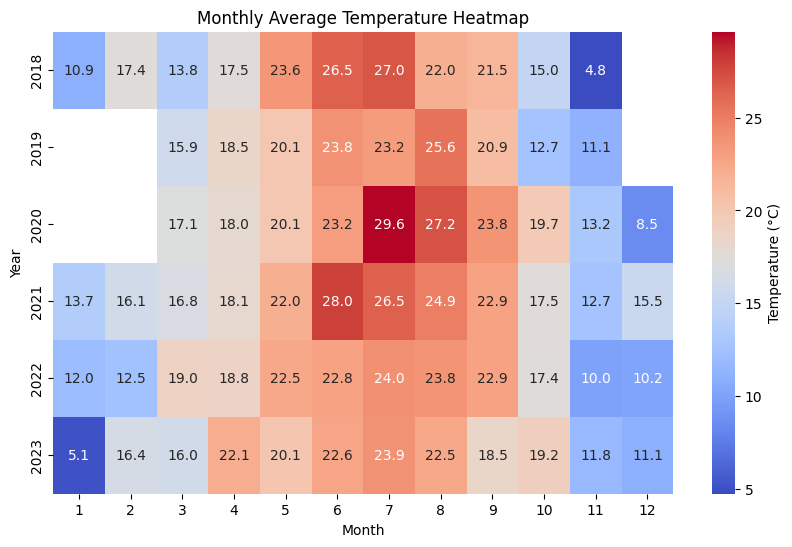

In [87]:
# Pivot for weather variables
weather_pivot = weather_summary.pivot_table(index='Year', columns='Month', values='temp')  
plt.figure(figsize=(10, 6))
sns.heatmap(weather_pivot, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Temperature (°C)'})
plt.title('Monthly Average Temperature Heatmap')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

# Fire Indices Heatmap

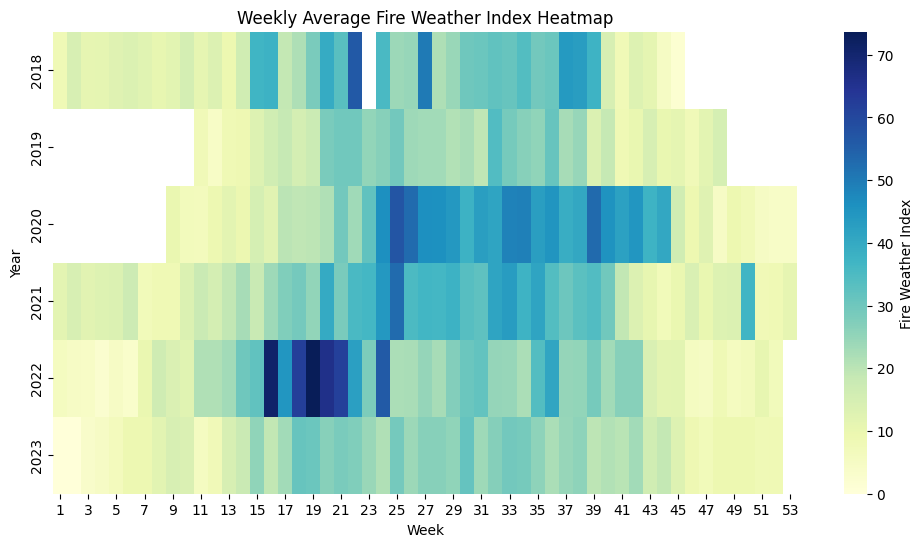

In [88]:
# Pivot for fire indices
fire_pivot = fire_indices_summary.pivot_table(index='Year', columns='Week', values='fwi')
plt.figure(figsize=(12, 6))
sns.heatmap(fire_pivot, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Fire Weather Index'})
plt.title('Weekly Average Fire Weather Index Heatmap')
plt.ylabel('Year')
plt.xlabel('Week')
plt.show()


# Code to Transform Numerical to Categorical Variables

In [89]:
# FFMC categories
def categorize_ffmc(value):
    if 0 <= value <= 30:
        return 'Very Wet'
    elif 30 < value <= 70:
        return 'Damp'
    elif 70 < value <= 85:
        return 'Dry'
    elif 85 < value <= 101:
        return 'Very Dry'
    else:
        return 'Unknown'

# DMC categories
def categorize_dmc(value):
    if 0 <= value <= 20:
        return 'Low Fire Danger'
    elif 21 <= value <= 40:
        return 'Moderate Fire Danger'
    elif 41 <= value <= 100:
        return 'High Fire Danger'
    elif value > 100:
        return 'Extreme Fire Danger'
    else:
        return 'Unknown'

# DC categories
def categorize_dc(value):
    if 0 <= value <= 100:
        return 'Wet Conditions'
    elif 101 <= value <= 300:
        return 'Moderate Drought'
    elif 301 <= value <= 500:
        return 'High Drought'
    elif value > 500:
        return 'Extreme Drought'
    else:
        return 'Unknown'

# Apply the functions to create new categorical columns
combined_data['FFMC_Level'] = combined_data['ffmc'].apply(categorize_ffmc)
combined_data['DMC_Level'] = combined_data['dmc'].apply(categorize_dmc)
combined_data['DC_Level'] = combined_data['dc'].apply(categorize_dc)

# Display the updated DataFrame
print(combined_data[['ffmc', 'FFMC_Level', 'dmc', 'DMC_Level', 'dc', 'DC_Level']].head())


        ffmc FFMC_Level         dmc             DMC_Level           dc  \
0  81.195999        Dry   14.066000       Low Fire Danger   126.575996   
1  89.865997   Very Dry   37.959000  Moderate Fire Danger   417.631989   
2  93.973999   Very Dry  262.731995   Extreme Fire Danger  1000.000000   
3  92.862999   Very Dry  153.479004   Extreme Fire Danger   526.336975   
4  84.081001        Dry   17.229000       Low Fire Danger    74.991997   

           DC_Level  
0  Moderate Drought  
1      High Drought  
2   Extreme Drought  
3   Extreme Drought  
4    Wet Conditions  


# Summarizing Categorical Data

In [90]:
# Summary of category counts
ffmc_counts = combined_data['FFMC_Level'].value_counts()
dmc_counts = combined_data['DMC_Level'].value_counts()
dc_counts = combined_data['DC_Level'].value_counts()

print("FFMC Level Counts:\n", ffmc_counts)
print("\nDMC Level Counts:\n", dmc_counts)
print("\nDC Level Counts:\n", dc_counts)

FFMC Level Counts:
 FFMC_Level
Very Dry    9395037
Dry         1136477
Damp         294465
Very Wet      34725
Name: count, dtype: int64

DMC Level Counts:
 DMC_Level
High Fire Danger        4934400
Extreme Fire Danger     3891884
Moderate Fire Danger     970425
Low Fire Danger          955416
Unknown                  108579
Name: count, dtype: int64

DC Level Counts:
 DC_Level
Extreme Drought     5180375
High Drought        3236962
Moderate Drought    1857700
Wet Conditions       567613
Unknown               18054
Name: count, dtype: int64


# Visualize Categorical Distributions

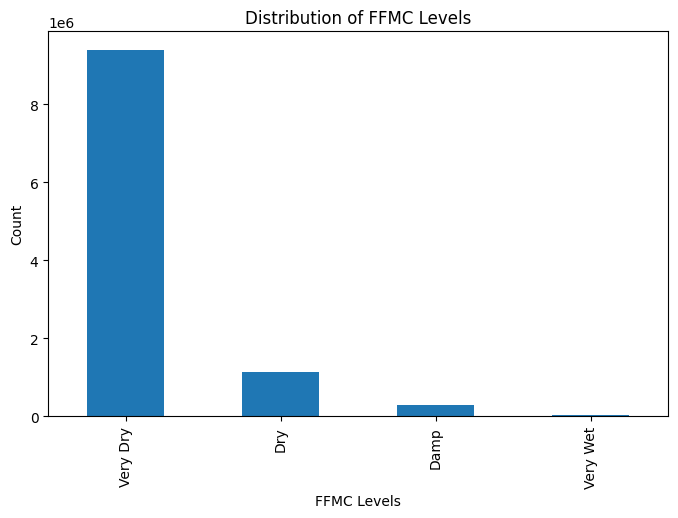

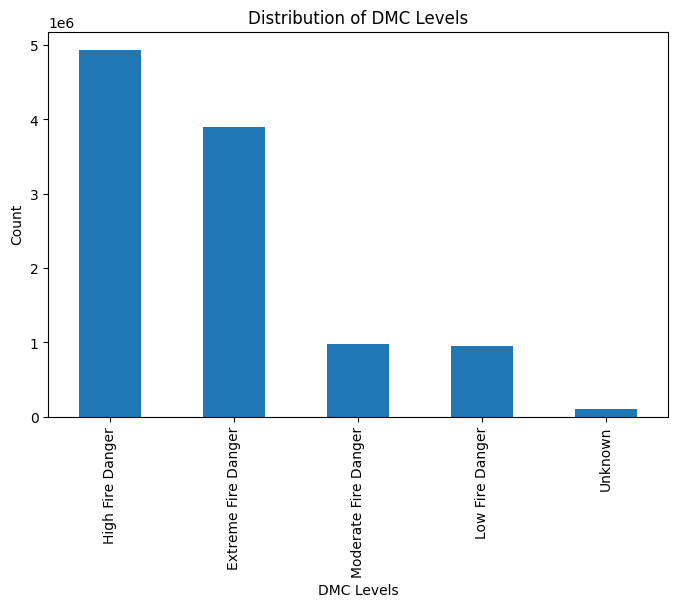

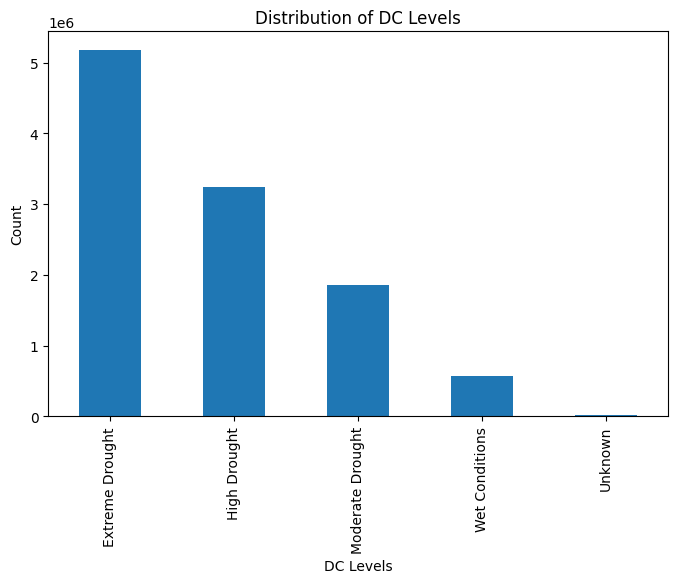

In [91]:
# Bar plot for FFMC_Level
ffmc_counts.plot(kind='bar', title='Distribution of FFMC Levels', figsize=(8, 5))
plt.ylabel('Count')
plt.xlabel('FFMC Levels')
plt.show()

# Repeat for DMC_Level and DC_Level
dmc_counts.plot(kind='bar', title='Distribution of DMC Levels', figsize=(8, 5))
plt.ylabel('Count')
plt.xlabel('DMC Levels')
plt.show()

dc_counts.plot(kind='bar', title='Distribution of DC Levels', figsize=(8, 5))
plt.ylabel('Count')
plt.xlabel('DC Levels')
plt.show()

# Compare Fire Indices to Weather Conditions

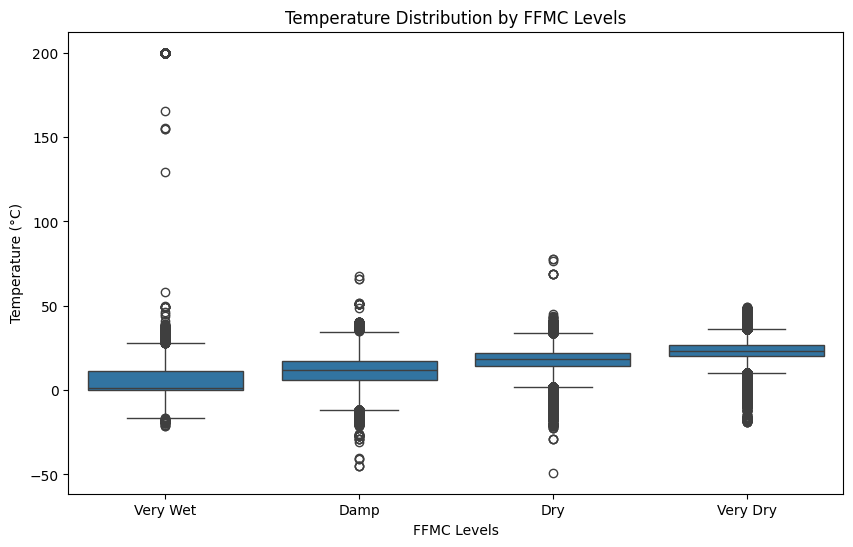

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='FFMC_Level', y='temp', data=combined_data, order=['Very Wet', 'Damp', 'Dry', 'Very Dry'])
plt.title('Temperature Distribution by FFMC Levels')
plt.xlabel('FFMC Levels')
plt.ylabel('Temperature (°C)')
plt.show()

Average Weather Variables by FFMC Level:
                  temp       pcp         ws         rh
FFMC_Level                                           
Damp        11.494650  4.499685  12.145907  67.151383
Dry         17.623613  1.270527  12.264448  55.048750
Very Dry    23.189571  0.278236  12.278640  35.709058
Very Wet    13.541134  9.204960   9.159599  35.562361


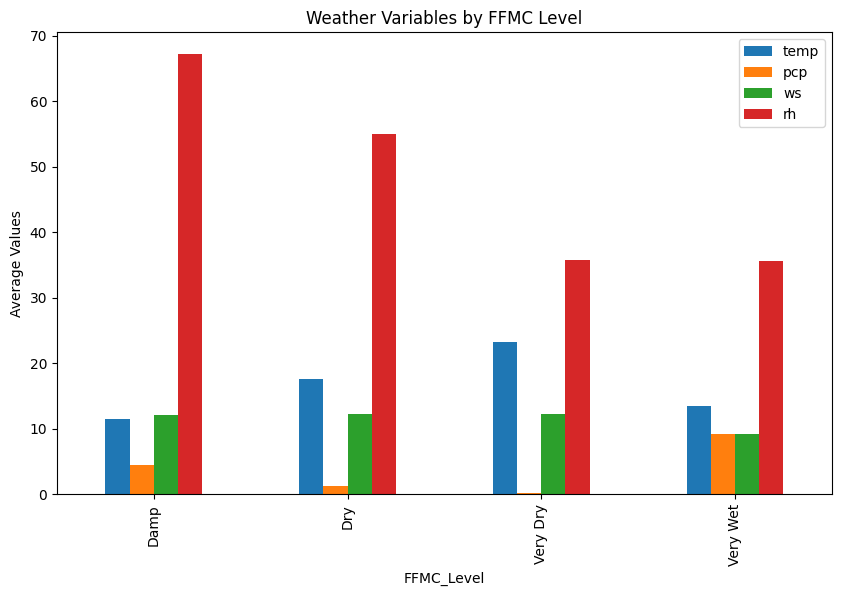

In [94]:
# Group by FFMC_Level and calculate mean weather variables
ffmc_weather_summary = combined_data.groupby('FFMC_Level')[['temp', 'pcp', 'ws', 'rh']].mean()
print("Average Weather Variables by FFMC Level:\n", ffmc_weather_summary)

# Plot as a bar chart
ffmc_weather_summary.plot(kind='bar', figsize=(10, 6), title='Weather Variables by FFMC Level')
plt.ylabel('Average Values')
plt.show()

The main purpose of transforming numerical data into categorical data is to make the data easier to interpret and analyze by dividing continuous values into meaningful categories. This helps:

1. **Simplify Insights**: Instead of interpreting raw numbers, we can identify patterns or trends by analyzing categories ("Low Fire Danger" vs. "Extreme Fire Danger").

2. **Improve Visualization**: Categories make it easier to create bar charts, pie charts, or other visualizations that summarize data distributions.

3. **Aid Decision-Making**: By grouping data into levels, we can set thresholds or priorities (for example, focus on areas with "Extreme Drought" for wildfire prevention).

# Wind Direction and Speed Analysis


**Objective:**
The purpose of this section is to analyze wind direction and speed using a wind rose plot.

Before plotting the wind rose, wind speed values were converted from kilometers per hour (km/h) to meters per second (m/s) for consistency with standard meteorological visualizations.

In [95]:
# Convert wind speed from km/h to m/s
combined_data['ws_m_s'] = combined_data['ws'] / 3.6

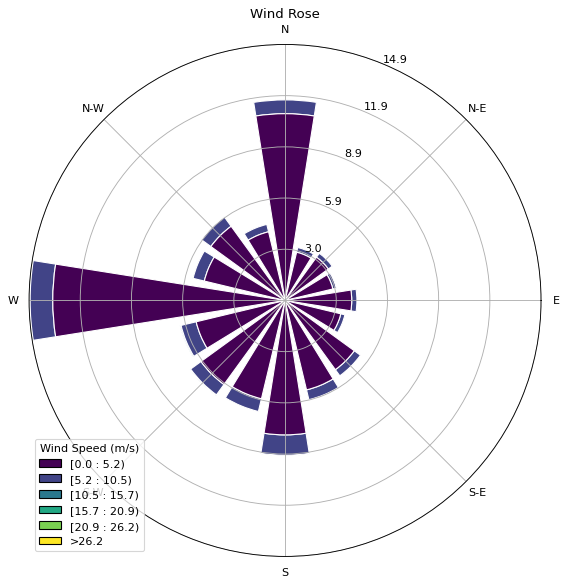

In [97]:
from windrose import WindroseAxes

# Create a wind rose plot
ax = WindroseAxes.from_ax()
ax.bar(combined_data['wd'], combined_data['ws_m_s'], normed=True, opening=0.8, edgecolor='white')
ax.set_title("Wind Rose")
ax.legend(title="Wind Speed (m/s)")
plt.show()

**Conclusion:**

The wind rose visualization highlights that west (W) is the dominant wind direction, followed by north (N).

 Most wind speeds are within the range of 0–5.2 m/s, which is relatively calm wind conditions. Higher wind speeds (above 10.5 m/s) are less frequent.

# Data Bases

In [98]:
import sqlite3

combined_data.head()

combined_data.size

369263936

In [99]:
folder_path = "/Users/javiermerino/Documents/Langara/2.CPSC4810/Project/DataBase"

os.makedirs(folder_path, exist_ok=True)

db_file = os.path.join(folder_path, "fire_data.db")

conn = sqlite3.connect(db_file)

table_name = "fire_table"
combined_data.to_sql(table_name,conn,if_exists="replace",index=True,chunksize=1000)

conn.close()

In [78]:
conn = sqlite3.connect("/Users/javiermerino/Documents/Langara/2.CPSC4810/Project/DataBase/fire_data.db")

def is_open(conn):
    try:
        cursor = conn.cursor()
        return True
    except sqlite3.ProgrammingError as e:
        return False

is_open(conn)

True

In [79]:
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table = cursor.fetchall()

print(f'The name of the table in the database is: {table}')

cursor.execute(f"PRAGMA table_info({table_name});")
columns = cursor.fetchall()
column_names = [col[1] for col in columns] 
    
formatted_column_names = [col.upper() for col in column_names]
    
print(f"\nThe names of the columns in '{table_name}' are as follows:")
print(formatted_column_names)
    
cursor.execute(f"SELECT * FROM {table_name} LIMIT 5;")
rows = cursor.fetchall()
    
print(f"\nThe first 5 rows in the table '{table_name}' are as follows:")
print(rows)

The name of the table in the database is: [('fire_table',)]

The names of the columns in 'fire_table' are as follows:
['INDEX', 'ELEV', 'FUEL', 'PCP', 'TEMP', 'FWI', 'REP_DATE', 'SFC', 'TFC', 'WS', 'LON', 'WD', 'DMC', 'SOURCE', 'CFB', 'RH', 'DC', 'SENSOR', 'SATELLITE', 'ROS', 'AGENCY', 'ISI', 'LAT', 'HFI', 'BUI', 'FFMC', 'YEAR']

The first 5 rows in the table 'fire_table' are as follows:
[(0, 164.0, 'C1', 0.0, 23.288999557495117, 7.813000202178955, '2021-09-14 05:14:00', 0.23293699324131012, 0.23293699324131012, 25.249000549316406, -95.94000244140625, 210, 14.065999984741211, 'USFS', 0.0, 72, 126.57599639892578, 'VIIRS', 'S-NPP', 0.17760999500751495, 'BC', 4.626999855041504, 34.249000549316406, 12.0, 22.016000747680664, 81.19599914550781, '2017'), (1, 410.0, 'O1', 0.0, 21.83799934387207, 33.88399887084961, '2021-09-14 05:14:00', 0.3499999940395355, 0.3499999940395355, 26.32699966430664, -99.39900207519531, 220, 37.95899963378906, 'USFS', 0.0, 42, 417.6319885253906, 'VIIRS', 'S-NPP', 50

In [80]:
sql_1 = """
SELECT satellite, COUNT(*) as Counts
FROM fire_table
GROUP BY satellite
ORDER BY satellite;
"""

rows = pd.read_sql_query(sql_1, conn)
df_sql = rows.set_index("satellite")

df_sql



,Counts
satellite,
A,205
Aqua,864134
JPSS1,64799
L8,14057
Landsat-8,340
METOP-A,150355
METOP-B,108157
N,12928
NOAA-15,54082


# Write into many chunks

In [81]:

# Path to the large CSV file
input_csv = "/Users/javiermerino/Documents/Langara/2.CPSC4810/Project/clean_data.csv"
chunk_size = 500000  # Number of rows per chunk

# Process in chunks
for i, chunk in enumerate(pd.read_csv(input_csv, chunksize=chunk_size)):
    output_csv = f"clean_data_{i+1}.csv"
    chunk.to_csv(output_csv, index=False)
    print(f"Chunk {i+1} saved to {output_csv}")

Chunk 1 saved to clean_data_1.csv
Chunk 2 saved to clean_data_2.csv
Chunk 3 saved to clean_data_3.csv
Chunk 4 saved to clean_data_4.csv
Chunk 5 saved to clean_data_5.csv
Chunk 6 saved to clean_data_6.csv
Chunk 7 saved to clean_data_7.csv
Chunk 8 saved to clean_data_8.csv
Chunk 9 saved to clean_data_9.csv
Chunk 10 saved to clean_data_10.csv
Chunk 11 saved to clean_data_11.csv
Chunk 12 saved to clean_data_12.csv
Chunk 13 saved to clean_data_13.csv
Chunk 14 saved to clean_data_14.csv
Chunk 15 saved to clean_data_15.csv
Chunk 16 saved to clean_data_16.csv
Chunk 17 saved to clean_data_17.csv
Chunk 18 saved to clean_data_18.csv
Chunk 19 saved to clean_data_19.csv
Chunk 20 saved to clean_data_20.csv
Chunk 21 saved to clean_data_21.csv
Chunk 22 saved to clean_data_22.csv


In [82]:
csv_file = "/Users/javiermerino/Documents/Langara/2.CPSC4810/Project/clean_data_1.csv"  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Convert the DataFrame to JSON
json_file = "clean_data_1.json"  # Desired output JSON file path
data.to_json(json_file, orient="records", lines=True)

print(f"CSV has been converted to JSON and saved as {json_file}")

CSV has been converted to JSON and saved as clean_data_1.json


In [83]:
# File paths
csv_file = "/Users/javiermerino/Documents/Langara/2.CPSC4810/Project/clean_data_1.csv"
json_file = "/Users/javiermerino/Documents/Langara/2.CPSC4810/Project/clean_data_1.json"

# Get file sizes
csv_size = os.path.getsize(csv_file)
json_size = os.path.getsize(json_file)

print(f"CSV File Size: {csv_size / (1024):.2f} KB")
print(f"JSON File Size: {json_size / (1024):.2f} KB")

CSV File Size: 102157.13 KB
JSON File Size: 187584.83 KB
